<a id="top"/>

# Table of content

[Context](#section0)<br>
1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
        - 3.1.1 [Check for distinct values for the categorical variables in the data](#section3011)<br/>
        - 3.1.2 [Check for spread for variables with continuous data.](#section3012)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
        - 3.2.1 [Pre profiling report](#section3021)<br/>
        - 3.2.2 [Some of the observations from the preprocessing report for the provided Dataset.](#section3022)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
        - 3.4.1 [Post profiling report](#section3041)<br/>
        - 3.4.2 [Observations based on post profiling report](#section3042)<br/>
4. [Data Analysis](#section4)
    - 4.1 [Preliminary analysis of the cleaned data.](#section401)<br/>
    - 4.2 [Price Relation with other columns in the dataset based on various categories](#section402)<br/>
        - 4.2.1 [Price Distribution per body type where price is not Extreme.](#section4021)<br/>
        - 4.2.2 [Check if car make has relation to the resale value of the car](#section4022)<br/>
        - 4.2.3 [Cars from which manufacturars sale more? expensive or economy?](#section4023)<br/>
        - 4.2.4 [Price Distribution per body type where price is Extreme](#section4024)<br/>
        - 4.2.5 [Price Distribution based on drive type and engine volume categories.](#section4025)<br/>
        - 4.2.6 [Price distribution based on age groups](#section4026)<br/>
        - 4.2.7 [Heatmap based on engV Category.](#section4027)<br/>
        - 4.2.8 [Heatmap based on body type.](#section4028)<br/>
        - 4.2.9 [Heatmap based on age groups.](#section4029)<br/>
        - 4.2.10 [Heatmap based on price categories.](#section40210)<br/>
5. [Hypothesis](#section5)
    - 5.1 [Hypothesis 1: Used car price is dependent on Age](#section51)<br/>
    - 5.2 [Hypothesis 2: Used car price is dependent on Engine Volume](#section52)<br/>
    - 5.3 [Hypothesis 3: Used car price is dependent on Mileage.](#section53)<br/>
    - 5.4 [Hypothesis 4 : Used car price is dependent on drive type.](#section54)<br/>
    - 5.5 [Hypothesis 5: Used car price is dependent on Body type.](#section55)<br/>
    - 5.5 [Hypothesis 6 : Milage/year for the car increases over years.](#section56)<br/>
    
6. [Conclusions](#section6)<br/>  

<a id='section0'/>

(This information is taken from the original Dataset from https://www.kaggle.com/antfarol/car-sale-advertisements/home)

# Context

This dataset was collected from car sale advertisements for study/practice purposes in 2016. Though there is couple well known car features datasets they seems quite simple and outdated. Car topic is really interesting. But I wanted to practice with real raw data which has all inconvenient moments (as NA’s for example).

This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. At the end of the day I look at this data as a subset from all Ukrainian car fleet.
Content

Dataset contains 9576 rows and 10 variables with essential meanings:

    car: manufacturer brand
    price: seller’s price in advertisement (in USD)
    body: car body type
    mileage: as mentioned in advertisement (‘000 Km)
    engV: rounded engine volume (‘000 cubic cm)
    engType: type of fuel (“Other” in this case should be treated as NA)
    registration: whether car registered in Ukraine or not
    year: year of production
    model: specific model name
    drive: drive type


[TOP](#top)<br>
<a id='section1'/>

### 1. Problem Statement

Find correlation between price and other parameters in the given used car sales dataset and derive conclusions on pricing of the used cars.

[^ TOP](#top)<br>
<a id='section2'/>

### 2. Data Loading and Description

Import required packages for the analysis.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")
from subprocess import check_output
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

Load the dataset and review head records.

In [2]:
car_sales = pd.read_csv(r'C:\INSAID\Term1\Project\Term-1\Data\Projects\car_sales.csv', encoding='latin-1')
car_sales.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

[^ TOP](#top)<br>
<a id='section3'/>

### 3. Data Profiling

This section focuses on 
<ul>
    <li>3.1 Understanding the Dataset</li>
    <li>3.2 Pre Profiling of the data</li>
    <li>3.3 Preprocessing of the data</li>
    <li>3.4 Post Profiling of the data</li>
</ul>

[^ TOP](#top)<br>
<a id='section301'/>

#### 3.1 Understanding the Dataset

This section explains basic charecteristics of the data like Shape, Columns, Column types, Basic statestics for various attributes (Columns) of the data etc.

In [3]:
car_sales.shape

(9576, 10)

In [4]:
car_sales.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

(This information is taken from the original Dataset from https://www.kaggle.com/antfarol/car-sale-advertisements/home)

Dataset contains 9576 rows and 10 variables with essential meanings:

    car: manufacturer brand
    price: seller’s price in advertisement (in USD)
    body: car body type
    mileage: as mentioned in advertisement (‘000 Km)
    engV: rounded engine volume (‘000 cubic cm)
    engType: type of fuel (“Other” in this case should be treated as NA)
    registration: whether car registered in Ukraine or not
    year: year of production
    model: specific model name
    drive: drive type

In [5]:
car_sales.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [6]:
car_sales.describe(include='all')

car          price   body      mileage         engV engType  \
count         9576    9576.000000   9576  9576.000000  9142.000000    9576   
unique          87            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           936            NaN   3646          NaN          NaN    4379   
mean           NaN   15633.317316    NaN   138.862364     2.646344     NaN   
std            NaN   24106.523436    NaN    98.629754     5.927699     NaN   
min            NaN       0.000000    NaN     0.000000     0.100000     NaN   
25%            NaN    4999.000000    NaN    70.000000     1.600000     NaN   
50%            NaN    9200.000000    NaN   128.000000     2.000000     NaN   
75%            NaN   16700.000000    NaN   194.000000     2.500000     NaN   
max            NaN  547800.000000    NaN   999.000000    99.990000     NaN   

       registration         year    model  drive  
count          9576  9576.000000     9576   9065  
unique            2          NaN      888      3  
top             yes          NaN  E-Class  front  
freq           9015          NaN      199   5188  
mean            NaN  2006.605994      NaN    NaN  
std             NaN     7.067924      NaN    NaN  
min             NaN  1953.000000      NaN    NaN  
25%             NaN  2004.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2012.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

[^ TOP](#top)<br>
<a id='section3011'/>

##### 3.1.1 Check for distinct values for the categorical variables in the data.

In [7]:
carlist=car_sales.car.unique()
carlist.sort()
print(carlist,"\nTotal number of cars : {0}".format(carlist.size))

['Acura' 'Alfa Romeo' 'Aro' 'Aston Martin' 'Audi' 'BMW' 'BYD' 'Barkas'
 'Bentley' 'Bogdan' 'Buick' 'Cadillac' 'Changan' 'Chery' 'Chevrolet'
 'Chrysler' 'Citroen' 'Dacia' 'Dadi' 'Daewoo' 'Daihatsu' 'Dodge' 'FAW'
 'Ferrari' 'Fiat' 'Fisker' 'Ford' 'GAZ' 'GMC' 'Geely' 'Great Wall' 'Groz'
 'Hafei' 'Honda' 'Huanghai' 'Hummer' 'Hyundai' 'Infiniti' 'Isuzu' 'JAC'
 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Lancia' 'Land Rover' 'Lexus' 'Lifan'
 'Lincoln' 'MG' 'MINI' 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mercury'
 'Mitsubishi' 'Moskvich-AZLK' 'Moskvich-Izh' 'Nissan' 'Opel' 'Other-Retro'
 'Peugeot' 'Porsche' 'Renault' 'Rolls-Royce' 'Rover' 'SMA' 'Saab' 'Samand'
 'Samsung' 'Seat' 'Skoda' 'Smart' 'SsangYong' 'Subaru' 'Suzuki' 'TATA'
 'Tesla' 'Toyota' 'UAZ' 'VAZ' 'Volkswagen' 'Volvo' 'Wartburg' 'ZAZ' 'ZX'
 'ËUAZ'] 
Total number of cars : 87


In [8]:
bodyTypes = car_sales.body.unique()
bodyTypes.sort()
print(bodyTypes,"\nTotal number of bodyTypes : {0}".format(bodyTypes.size))

['crossover' 'hatch' 'other' 'sedan' 'vagon' 'van'] 
Total number of bodyTypes : 6


In [9]:
engTypes = car_sales.engType.unique()
engTypes.sort()
print(engTypes,"\nTotal number of engTypes : {0}".format(engTypes.size))

['Diesel' 'Gas' 'Other' 'Petrol'] 
Total number of engTypes : 4


In [10]:
registrations = car_sales.registration.unique()
registrations.sort()
print(registrations,"\nTypes of registrations : {0}".format(registrations.size))

['no' 'yes'] 
Types of registrations : 2


In [11]:
drives = car_sales.drive.unique()
print(drives,"\nTotal number of drives : {0}".format(drives.size))

['full' 'rear' 'front' nan] 
Total number of drives : 4


Variable "drive" has "NaN" values and should be cleaned.

In [12]:
models = car_sales.model.unique()
models
print(models,"\nTotal number of models : {0}".format(models.size))

['Kuga' 'E-Class' 'CL 550' 'B 180' 'X-Trail' 'Accord' 'Megane' 'Qashqai'
 '316' '750' 'GLE-Class' 'M5' 'Range Rover' 'X5' 'Leaf' 'Passat B6' 'A6'
 'Sebring' 'XF' 'Sprinter 324 ïàññ.' '5 Series' '520' 'Outlander' 'Juke'
 'Galant' 'Sportage' 'Cayenne' 'Passat B5' 'Land Cruiser 200' 'Q7'
 'Outlander XL' 'Vito ïàññ.' 'Camry' 'Panamera' 'Touareg'
 'T5 (Transporter) ãðóç' '530' 'Accent' 'T5 (Transporter) ïàññ.'
 'Land Cruiser Prado' 'Vectra C' 'GLS 350' 'X6' 'Q5' '318' 'Lacetti'
 'Superb' 'Range Rover Sport' 'Passat B7' 'Lancer X' 'Range Rover Evoque'
 'Lanos' 'Pajero Wagon' 'Vito ãðóç.' 'Octavia A5' '3' '6' 'LX 570' '740'
 'GS 300' 'S 350' 'A5' 'C-Class' 'Tucson' 'Octavia A7' 'FX 37' 'GX'
 'CL 55 AMG' 'IQ' 'Model S' 'A4' 'Forester' 'Ceed' 'Polo' '2121' 'Civic'
 'Aveo' 'Lancer' 'Murano' 'Focus' 'Sorento' 'Astra G' 'Macan' '147'
 'ML 500' 'Fortwo' 'Duster' 'LX 450' 'Santa FE' '2114' 'Caddy ïàññ.'
 'S 320' 'Fiesta' 'Partner ïàññ.' 'Grand Vitara' 'X6 M' 'Trafic ïàññ.'
 'Caddy ãðóç.' '307' 'A8' 

In [13]:
years = car_sales.year.unique()
years
print(years,"\nRange of years is : {0} years.\n Earliest year is : {1} and\n Latest year is : {2} ".format(years.max()-years.min(), years.min(), years.max()))

[2010 2011 2008 2012 2013 2003 2016 1996 2006 2007 2014 2015 1999 2002
 1997 2000 2009 1998 2001 2005 2004 1987 1994 1989 1992 1993 1995 1986
 1991 1990 1981 1978 1988 1961 1985 1983 1974 1971 1979 1982 1958 1962
 1963 1977 1980 1959 1984 1973 1953 1970 1976 1972 1964 1969 1968 1975] 
Range of years is : 63 years.
 Earliest year is : 1953 and
 Latest year is : 2016 


[^ TOP](#top)<br>
<a id='section3012'/>

##### 3.1.2 Check for spread for variables with continuous data.

Following are the variables of continuous nature
    price
    milage
    engV


In [14]:
# Price range excluding the Zero values in the price variable.

car_sales_pgtz = car_sales[car_sales.price != 0]
car_sales_pgtz.price.describe()

count      9309.000000
mean      16081.710884
std       24301.899483
min         259.350000
25%        5400.000000
50%        9500.000000
75%       17000.000000
max      547800.000000
Name: price, dtype: float64

Price has a very high standard deviation thus will require to categorize in price buckets to effectively analyse this variable.

In [15]:
car_sales_mgtz = car_sales[car_sales.mileage != 0]
car_sales_mgtz.mileage.describe()

count    9228.000000
mean      144.099046
std        96.643855
min         1.000000
25%        76.000000
50%       130.000000
75%       198.000000
max       999.000000
Name: mileage, dtype: float64

Milage would depend on how many year old the vehical is thus would require to create a derived column annual milage depicting average annual milage of the cars.

In [16]:
car_sales.engV.describe()

count    9142.000000
mean        2.646344
std         5.927699
min         0.100000
25%         1.600000
50%         2.000000
75%         2.500000
max        99.990000
Name: engV, dtype: float64

"engV" column has "NaN"s and also some incorrect data thus would require cleaning of data to replace/drop, NaN and incorrect data.

[^ TOP](#top)<br>
<a id='section3013'/>

##### 3.1.3 Summary of observations from initail data understanding.

- Total number of car Makes : 87
- Total number of bodyTypes : 6
- Total number of engTypes : 4
- Types of registrations (Ukraine or outside) : 2
- Types of drives : 4
    - Variable "drive" has "NaN" values and should be cleaned.
- Total number of models : 888 (Highly cardinal and need to sanitize the data or decide whether to use and how to use this variable.)
- Range of years is : 63 years.
    - Earliest year is : 1953 and
    - Latest year is : 2016 
- Price has zeros and need to sanitize this variable and if required drop the data.
    - After removing Zeros from Price,it has a very high standard deviation thus will require to categorize in price buckets to effectively analyse this variable.
- Milage would depend on how many year old the vehical is thus would require to create a derived column annual milage depicting average annual milage of the cars.
- "engV" column has "NaN"s and also some incorrect data thus would require cleaning of data to replace/drop, NaN and incorrect data.

[^ TOP](#top)<br>
<a id='section302'/>

#### 3.2 Pre Profiling of the data

In [17]:
profile = pandas_profiling.ProfileReport(car_sales)
profile.to_file(outputfile="car_sales_before_preprocessing.html")

[^ TOP](#top)<br>
<a id='section3021'/>

##### 3.2.1 Pre profiling report.

<a href="./car_sales_before_preprocessing.html">Before Preprocessing profiling report</a>

[^ TOP](#top)<br>
<a id='section3022'/>

##### 3.2.2 Some of the observations from the preprocessing report for the provided Dataset.
<ul>
    <li><b>Summary Observations</b>
    <ul>
        <li><b>Number of variables 	10</b><ul>
        <li><b>Numeric 	4 </b></li>
        <li><b>Categorical 	6 </b></li></ul></li>
        <li><b>Number of observations 	9576</b></li>
        <li><b>Total Missing values (%) 	1.0%</b></li>
    </ul></li>
    <li><b>car has a high cardinality: </b>87 distinct values</li>
    <li><b>model has a high cardinality:</b> 888 distinct values</li>
    <li><b>drive has </b> 511 / 5.3% missing values</li>
    <li><b>engV has</b> 434 / 4.5% missing values</li>
    <li><b>mileage has</b> 348 / 3.6% zeros</li>
    <li><b>price has</b> 267 / 2.8% zeros Zeros</li>
    <li><b>Dataset has 113 duplicate rows</b></li>
    <li><b>Other Observations - Correlations</b>
        <ul>
            <li><b>Price is strongly positively correlated to Year</b> : Price is higher where car age lower. (Age being inverse of Year of manufacturing.)</li>
            <li><b>Price is positively correlated to Engine Volume</b> : Price is higher where car engine volume (Power) is higher.</li>
            <li><b>Price is Negatively correlated to Milage</b> : Price is higher where car has run less miles.</li>
            <li><b>Mileage is strongly negatively correlated to Year</b> Higher the age of the car higher the mileage(miles run.)</li>
         </ul></li>
    <li><b>Other Observations - Validity of values</b>
        <ul>
            <li><b>engV</b> has values starting from 0 till 99.99, where as valid values should be in the range 1-8 '000 cubic cm.</li>
            <li><b>mileage</b> has values starting from 0 , where as valid values should be greater than 0 miles</li>
         </ul></li>
</ul>

[^ TOP](#top)<br>
<a id='section303'/>

#### 3.3 Preprocessing

###### We plan to achieve following based on observations above after analysing initial dataset.

- Remove the duplicates
- Sanitize the <b>"price"</b> column by replacing/dropping Zero's for this column.
- Sanitize <b>"drive"</b> column by replacing/dropping NaN values.
- Sanitize <b>"engV"</b> column by replacing/dropping NaN and invalid values.
- Sanitize <b>"mileage"</b> column where valid values should be greater than 0 miles unless its a new car (Year = 2016).
- Add derived columns based on age, age groups, engV categories, price categories, mileage/year and mileage/year categories.

###### For Achieving above we will take the following approach.

- Create a copy of the original dataframe.
- perform following to clense the copy of the dataframe 
    - Drop duplicates.
    - Try to set missing/invalid values for "mileage", "price","engV" & "drive" based on similar "car","model","year" values.
    - Drop records which still have NaNs/Zeros for "price","engV" or "drive" columns.
    - Drop records where mileage is Zero and year is not "2016" 
    - Add Derived columns for age, age_Group, engV_cat, price_cat etc. for grouping the data.
    - Add derived column mileage/year and categories for mileage/year. 
- Review the final dataframe.
- Make the copy as primary dataframe for further analysis.



In [18]:
# Create a copy of the original dataframe.
cars_clean = car_sales.copy()

In [19]:
# Drop duplicate records from the dataframe.
cars_clean.drop_duplicates(keep='first', inplace=True)

In [20]:
# group records by 'car','model','year'
grouped_cars_clean = cars_clean.groupby(by=['car','model','year'])
# print(grouped_cars_clean.engV.median())

In [21]:
# where ever price is 0 replace with NaN
cars_clean.loc[cars_clean[(cars_clean.price <= 0)].index,'price'] = np.NaN

In [22]:
# where ever mileage is 0 and if it is not a new car replace mileage with NaN
cars_clean.loc[cars_clean[(cars_clean.mileage <= 0)&(cars_clean.year != 2016)].index,'mileage'] = np.NaN

In [23]:
# replace engV where ever values are more than 10 and less than 0.8 with NaN as these are incorrect values
cars_clean.loc[car_sales[(car_sales.engV >= 7)|(car_sales.engV <= 0.8)].index,'engV'] = np.NaN

Based on group data replace values for similar car, model and year for NaNs in engV, mileage,drive, price.

In [24]:
for car, model  in grouped_cars_clean:
    try:
#         print("car is {0}, model is {1} and year of manufacturing is {2}".format(car[0],car[1],car[2]) )
        engV_val = grouped_cars_clean.engV.median()[car[0],car[1],car[2]]
        mileage_val = grouped_cars_clean.mileage.median()[car[0],car[1],car[2]]
        price_val = grouped_cars_clean.price.median()[car[0],car[1],car[2]]
        drive_val_set = grouped_cars_clean.drive.value_counts()[car[0],car[1],car[2]]
        drive_val = drive_val_set[drive_val_set == drive_val_set.max()].index[0]
        values = {'engV':engV_val,'mileage':mileage_val,'drive':drive_val,'price':price_val}
#         print(cars_clean.loc[(cars_clean.model == car[1])&(cars_clean.car == car[0])&(cars_clean.year == car[2])])
        cars_clean.loc[(cars_clean.model == car[1])&(cars_clean.car == car[0])&(cars_clean.year == car[2])] = cars_clean.loc[(cars_clean.model == car[1])&(cars_clean.car == car[0])&(cars_clean.year == car[2])].fillna(values)
#         print(cars_clean.loc[(cars_clean.model == car[1])&(cars_clean.car == car[0])&(cars_clean.year == car[2])].head())
    except KeyError:
        print('.', end =" ")
    except IndexError:
        print('Index does not exist')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [25]:
cars_clean.describe(include="all")

car          price   body      mileage         engV engType  \
count         9463    9413.000000   9463  9443.000000  9237.000000    9463   
unique          87            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           927            NaN   3622          NaN          NaN    4341   
mean           NaN   16457.419917    NaN   140.393784     2.232778     NaN   
std            NaN   25136.701401    NaN    98.218204     0.952672     NaN   
min            NaN     259.350000    NaN     0.000000     0.900000     NaN   
25%            NaN    5400.000000    NaN    71.000000     1.600000     NaN   
50%            NaN    9500.000000    NaN   129.000000     2.000000     NaN   
75%            NaN   17000.000000    NaN   195.000000     2.500000     NaN   
max            NaN  547800.000000    NaN   999.000000     6.750000     NaN   

       registration         year    model  drive  
count          9463  9463.000000     9463   9347  
unique            2          NaN      888      3  
top             yes          NaN  E-Class  front  
freq           8902          NaN      192   5429  
mean            NaN  2006.525837      NaN    NaN  
std             NaN     7.062584      NaN    NaN  
min             NaN  1953.000000      NaN    NaN  
25%             NaN  2004.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2012.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

In [26]:
# Drop remaining NaN records from the dataframe.
cars_clean.dropna(inplace=True)

In [27]:
cars_clean.describe(include="all")

car          price   body      mileage         engV engType  \
count         9095    9095.000000   9095  9095.000000  9095.000000    9095   
unique          83            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           910            NaN   3514          NaN          NaN    4173   
mean           NaN   16375.589933    NaN   141.662397     2.228299     NaN   
std            NaN   24789.196724    NaN    97.715494     0.946221     NaN   
min            NaN     259.350000    NaN     0.000000     0.900000     NaN   
25%            NaN    5500.000000    NaN    74.000000     1.600000     NaN   
50%            NaN    9555.000000    NaN   130.000000     2.000000     NaN   
75%            NaN   17000.000000    NaN   197.000000     2.500000     NaN   
max            NaN  547800.000000    NaN   999.000000     6.750000     NaN   

       registration         year    model  drive  
count          9095  9095.000000     9095   9095  
unique            2          NaN      839      3  
top             yes          NaN  E-Class  front  
freq           8549          NaN      191   5306  
mean            NaN  2006.566245      NaN    NaN  
std             NaN     6.887195      NaN    NaN  
min             NaN  1959.000000      NaN    NaN  
25%             NaN  2004.000000      NaN    NaN  
50%             NaN  2008.000000      NaN    NaN  
75%             NaN  2011.000000      NaN    NaN  
max             NaN  2016.000000      NaN    NaN

<b>Adding engV_cat column</b> with engV ranges as below
- 0 - 2 Low Power
- 2 - 4 Moderate Power
- 4 - 6 High Power
- 6 + Extreme Power

In [28]:
cars_clean['engV_cat'] = pd.cut(cars_clean['engV'].dropna(),
                         [0,2,4,6,10],
                         labels=['Low','Moderate','High','Extreme'], include_lowest=True)
cars_clean.engV_cat.value_counts().sort_index()
# cars_clean.engV_cat.value_counts().sum()

Low         5652
Moderate    2851
High         565
Extreme       27
Name: engV_cat, dtype: int64

<b>Adding age and age_Group column</b> with age_Group values 

'0-1','1-3','3-6','6-10','10-29','30+'

In [29]:
cars_clean['age'] = cars_clean.year.apply(lambda x: 2016-x) 
cars_clean['age_Group'] = pd.cut(cars_clean['age'].dropna(),
                         [0,1,3,6,10,30,100],
                         labels=['0-1','1-3','3-6','6-10','10-29','30+'], include_lowest=True)
cars_clean.age_Group.value_counts().sort_index()

0-1       600
1-3       929
3-6      1800
6-10     2923
10-29    2737
30+       106
Name: age_Group, dtype: int64

Adding price_cat column with price ranges
- 0 - 10000 Low
- 10000 - 50000 Moderate 
- 50000 - 100000 High 
- 100000 + Extreme 

In [30]:
cars_clean['price_cat'] = pd.cut(cars_clean['price'].dropna(),
                         [0,10000,50000,100000,100000000],
                         labels=['Low','Moderate','High','Extreme'], include_lowest=True)
cars_clean.price_cat.value_counts().sort_index()
# cars_clean.price_cat.value_counts().sum()

Low         4796
Moderate    3791
High         350
Extreme      158
Name: price_cat, dtype: int64

Adding mileage per year (mpy) and categoies based on mpy (mpy_cat) column with mpy ranges
- 0 - 10 Low
- 10 - 15 Moderate
- 15 - 25 High
- 25 + Extreme


In [31]:
cars_clean["mpy"] = 0
cars_clean.loc[
    cars_clean[
        (cars_clean.mileage > 0)&
        (cars_clean.age > 0)].index,'mpy'] = round((cars_clean[(cars_clean.mileage > 0)
                                                              &(cars_clean.age > 0)].mileage
                                                   /cars_clean[(cars_clean.mileage > 0)
                                                               &(cars_clean.age > 0)].age),2)
# print(cars_clean.mpy.head(200))
cars_clean['mpy_cat'] = pd.cut(cars_clean['mpy'].dropna(),
                         [0,10,15,25,100000],
                         labels=['Low','Moderate','High','Extreme'], include_lowest=True)
cars_clean.mpy_cat.value_counts().sort_index()
# cars_clean.mpy_cat.value_counts().sum()

Low         1870
Moderate    2340
High        3588
Extreme     1297
Name: mpy_cat, dtype: int64

In [32]:
cars_clean.describe(include='all')

car          price   body      mileage         engV engType  \
count         9095    9095.000000   9095  9095.000000  9095.000000    9095   
unique          83            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           910            NaN   3514          NaN          NaN    4173   
mean           NaN   16375.589933    NaN   141.662397     2.228299     NaN   
std            NaN   24789.196724    NaN    97.715494     0.946221     NaN   
min            NaN     259.350000    NaN     0.000000     0.900000     NaN   
25%            NaN    5500.000000    NaN    74.000000     1.600000     NaN   
50%            NaN    9555.000000    NaN   130.000000     2.000000     NaN   
75%            NaN   17000.000000    NaN   197.000000     2.500000     NaN   
max            NaN  547800.000000    NaN   999.000000     6.750000     NaN   

       registration         year    model  drive engV_cat          age  \
count          9095  9095.000000     9095   9095     9095  9095.000000   
unique            2          NaN      839      3        4          NaN   
top             yes          NaN  E-Class  front      Low          NaN   
freq           8549          NaN      191   5306     5652          NaN   
mean            NaN  2006.566245      NaN    NaN      NaN     9.433755   
std             NaN     6.887195      NaN    NaN      NaN     6.887195   
min             NaN  1959.000000      NaN    NaN      NaN     0.000000   
25%             NaN  2004.000000      NaN    NaN      NaN     5.000000   
50%             NaN  2008.000000      NaN    NaN      NaN     8.000000   
75%             NaN  2011.000000      NaN    NaN      NaN    12.000000   
max             NaN  2016.000000      NaN    NaN      NaN    57.000000   

       age_Group price_cat          mpy mpy_cat  
count       9095      9095  9095.000000    9095  
unique         6         4          NaN       4  
top         6-10       Low          NaN    High  
freq        2923      4796          NaN    3588  
mean         NaN       NaN    17.030325     NaN  
std          NaN       NaN    12.948138     NaN  
min          NaN       NaN     0.000000     NaN  
25%          NaN       NaN    11.250000     NaN  
50%          NaN       NaN    15.730000     NaN  
75%          NaN       NaN    21.000000     NaN  
max          NaN       NaN   410.000000     NaN

[^ TOP](#top)<br>
<a id='section304'/>

##### 3.4 Post profiling

In [33]:
profile = pandas_profiling.ProfileReport(cars_clean)
profile.to_file(outputfile="car_sales_after_preprocessing.html")

[^ TOP](#top)<br>
<a id='section3041'/>

##### 3.4.1 Post profiling report

<a href="./car_sales_after_preprocessing.html">After Preprocessing profiling report</a>

[^ TOP](#top)<br>
<a id='section3041'/>

##### 3.4.2 Observations based on post profiling report

##### After preprocessing following are the observations. 
- age has 399 / 4.4% zeros - This is valid in cases where car is new.    
- mileage has 251 / 2.8% zeros - This is possible where car is new    
- mpy has 399 / 4.4% zeros - this is derived column from mileage and Age thus this is expected.
- car has a high cardinality: 83 distinct values 
- model has a high cardinality: 839 distinct values

[^ TOP](#top)<br>
<a id='section4'/>

### 4. Data Analysis

This section analyses the data further for their correlations based on variaous categories.

[^ TOP](#top)<br>
<a id='section401'/>

#### 4.1 Preliminary analysis of the cleaned data.

##### Distribution of observations in categorical data.

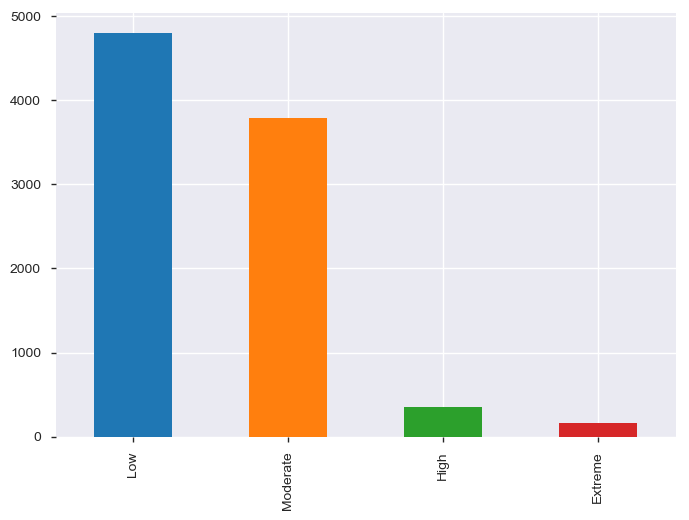

In [34]:
cars_clean.price_cat.value_counts().plot.bar()
plt.show()

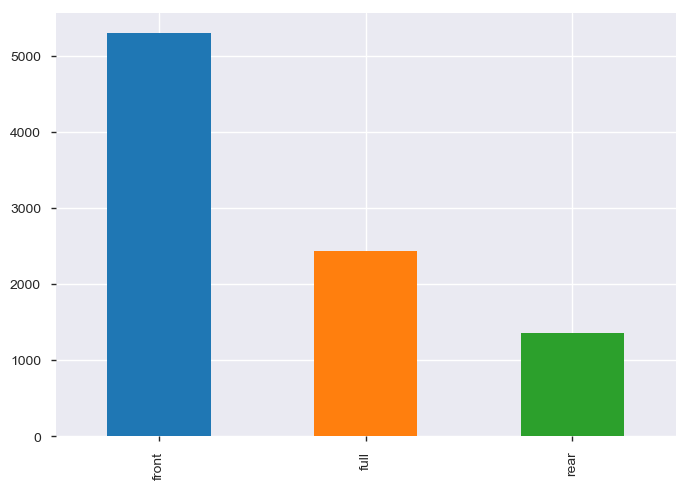

In [35]:
cars_clean.drive.value_counts().plot.bar()
plt.show()

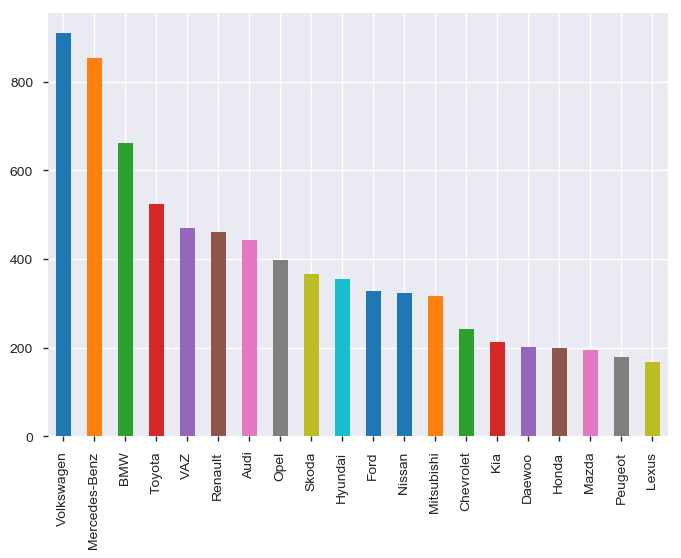

In [36]:
cars_clean.car.value_counts().head(20).plot.bar()
plt.show()

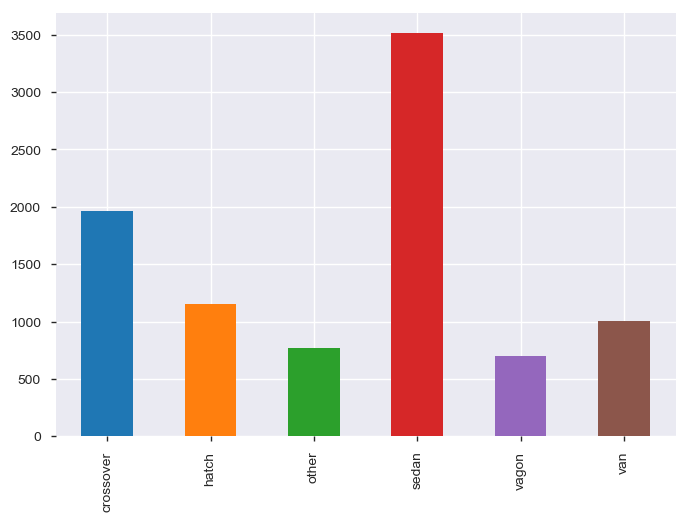

In [149]:
cars_clean.body.value_counts().sort_index().plot.bar()
plt.show()

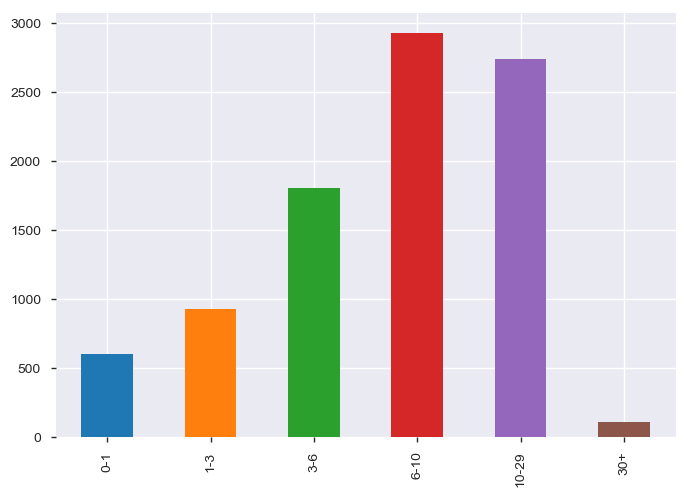

In [38]:
cars_clean.age_Group.value_counts().sort_index().plot.bar()
plt.show()

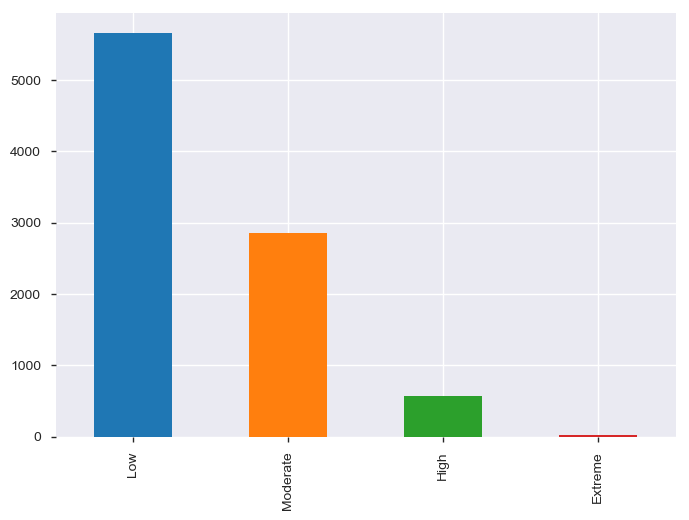

In [39]:
cars_clean.engV_cat.value_counts().sort_index().plot.bar()
plt.show()

##### Age distribution for each body type where age is less than 30.

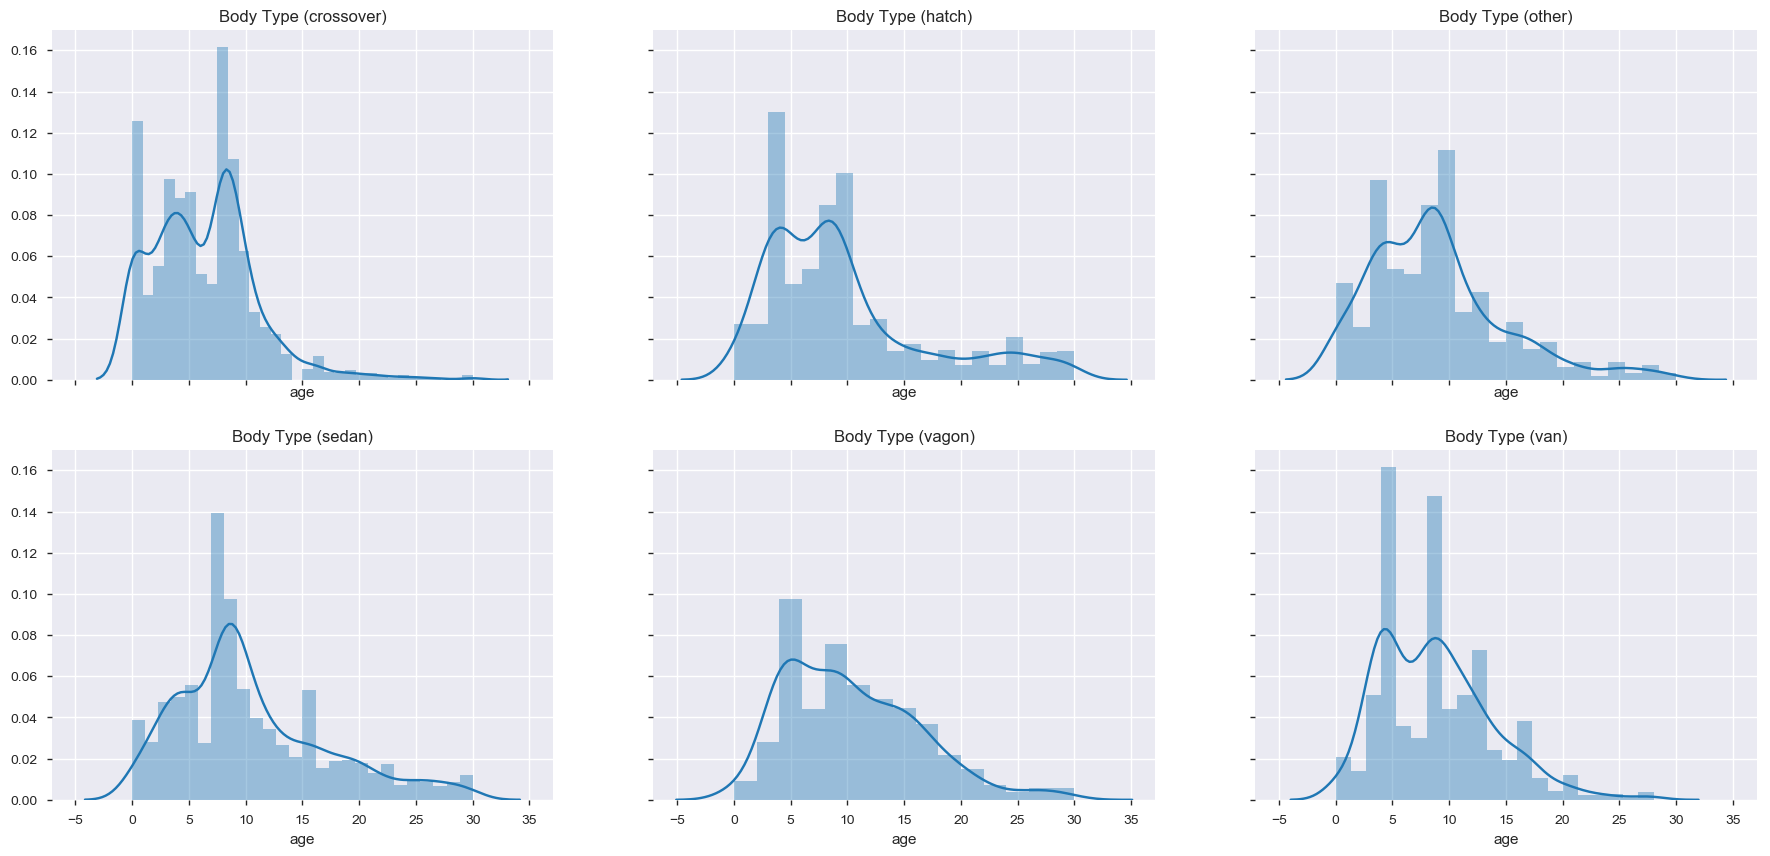

In [150]:
bodyTypes.sort()
bodyTypes
f,ax = plt.subplots(2,3,figsize=(22,10),sharex=True,sharey=True)
row = 0
for index, body in enumerate(bodyTypes):
    if index < 3:
        sns.distplot(cars_clean[(cars_clean.body == body)&(cars_clean.age_Group != "30+")].age,ax=ax[row,index])
#         title = 'Body Type ({0})'.format(body)
        ax[row,index].set_title('Body Type ({0})'.format(body))
    else:
        sns.distplot(cars_clean[(cars_clean.body == body)&(cars_clean.age_Group != "30+")].age,ax=ax[row+1,index-3])
        ax[row+1,index-3].set_title('Body Type ({0})'.format(body))

- Maximum Age distribution for Crossover is between 0-12 years 
    - with maximun new cars.
    - with peaks at 4-6 and 8-9 year old cars
- Maximum Age distribution for Sedan is between 0-25 years
    - with peak at 8-9 year old cars
- Maximum Age distribution for Van is between 0-17 years
    - with peaks at 5 and 9 year old cars
- Maximum Age distribution for Vagon is between 0-20 years
    - with peak between 5-10 year old cars
- Maximum Age distribution for Hatch is between 0-13 years
    - with peaks at 4 and 8-10 year old cars
- Maximum Age distribution for Other cars is between 0-19 years
    - with peaks at 4 and 8-10 year old cars
    
##### Observations based on above are 
- People change the crossovers more frequently than other car types.
- Normally Sedan cars are changed after 8 years of car age.
- Van, Vagon and Hatch cars are changed at much lower age (5-8 years)
- Over all most cars are sold between the age of 4-10 years.

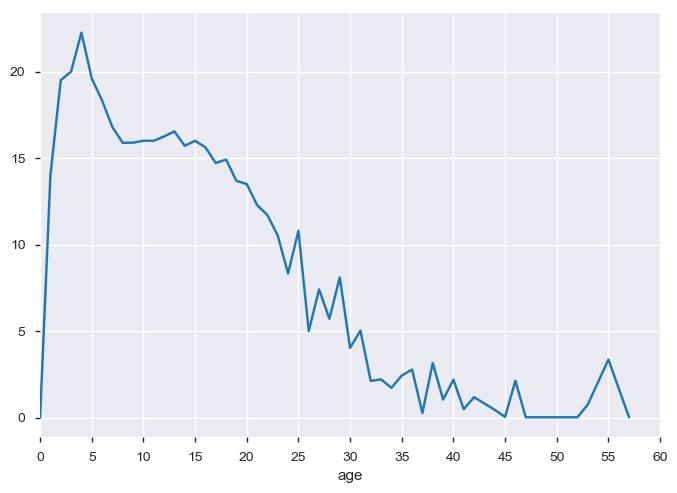

In [41]:
age_cars = cars_clean.groupby(by='age')
lp = age_cars.mpy.median().plot.line()
lp.set(xlim=(0,60),xticks=np.arange(0,65,5))
plt.show()

##### Most newer cars have higher milage per year 
- Mileage/year increases till 4 year old cars and gradually reduces for cars older than 4 years. 
- Mileage/year reduces to less than 5000 miles/year after 30 years of age.

[^ TOP](#top)<br>
<a id='section402'/>

#### 4.2 Price Relation with other columns in the dataset based on various categories

Price as dependent variable, evaluating the dependency of price on various other attributes of the dataset and their categories. 

<a id='section4021'/>

##### 4.2.1 Price Distribution per body type where price is not Extreme.

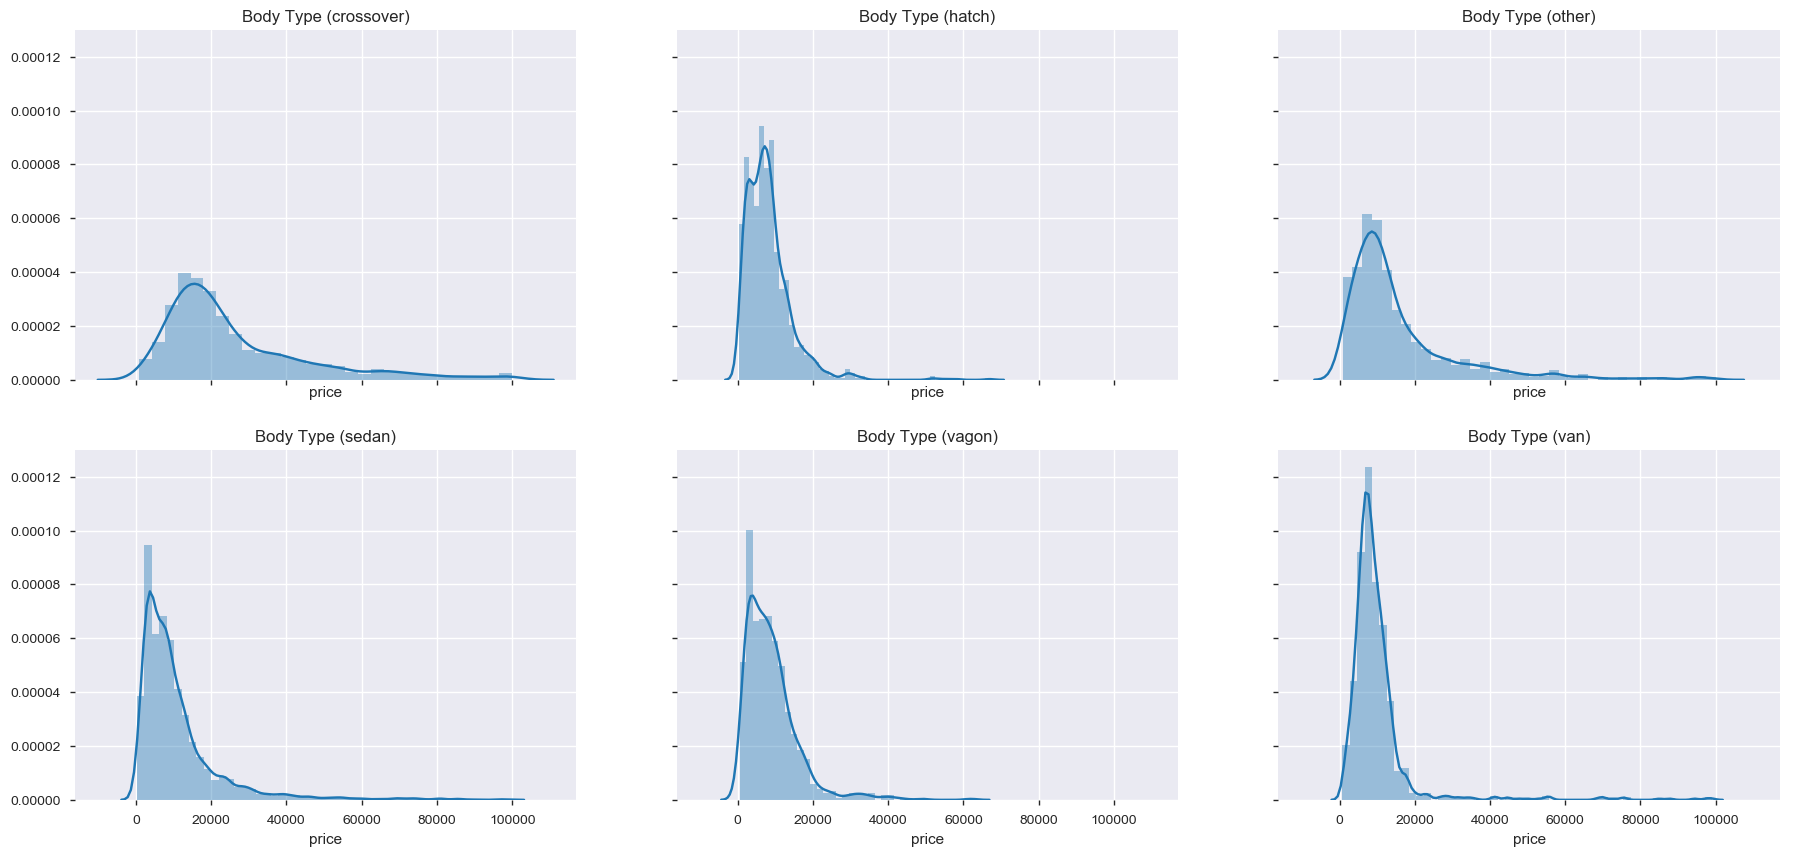

In [42]:
f,ax = plt.subplots(2,3,figsize=(22,10),sharex=True,sharey=True)

row = 0
for index, body in enumerate(bodyTypes):
    if index < 3:
        sns.distplot(cars_clean[(cars_clean.body == body)&(cars_clean.price_cat != 'Extreme')].price,ax=ax[row,index])
        title = 'Body Type ({0})'.format(body)
        ax[row,index].set_title(title)
    else:
        sns.distplot(cars_clean[(cars_clean.body == body)&(cars_clean.price_cat != 'Extreme')].price,ax=ax[row+1,index-3])
        ax[row+1,index-3].set_title('Body Type ({0})'.format(body))

- Price ranges of cars other than extremely priced (> 100000 USD) cars.
    - Crossover : few hundreds to 60000+ USD (with Median at ~ 17000 USD)
    - Sedan : few hundreds to 40000 USD (with Median at ~ 3000 USD)
    - Van : few hundreds to 18000 USD  (with Median at ~ 8000 USD)
    - Vagon : few hundreds to 22000 USD (with Median at ~ 3000 USD)
    - Hatch : few hundreds to 22000 USD (with Median at ~ 6000 USD)
    - Other : few hundreds to 40000 USD (with Median at ~ 10000 USD)

##### Observations based on above
- Crossovers have overall better average resale price compared to other cars.
- Sedan and Vagons have relatively lowest average resale price.
- Crossover and Sedans have wider price ranges. (Some make of the cars seems to have better resale value compared to others)

<a id='section4022'/>

##### 4.2.2 Check if car make has relation to the resale value of the car in crossover and sedan types

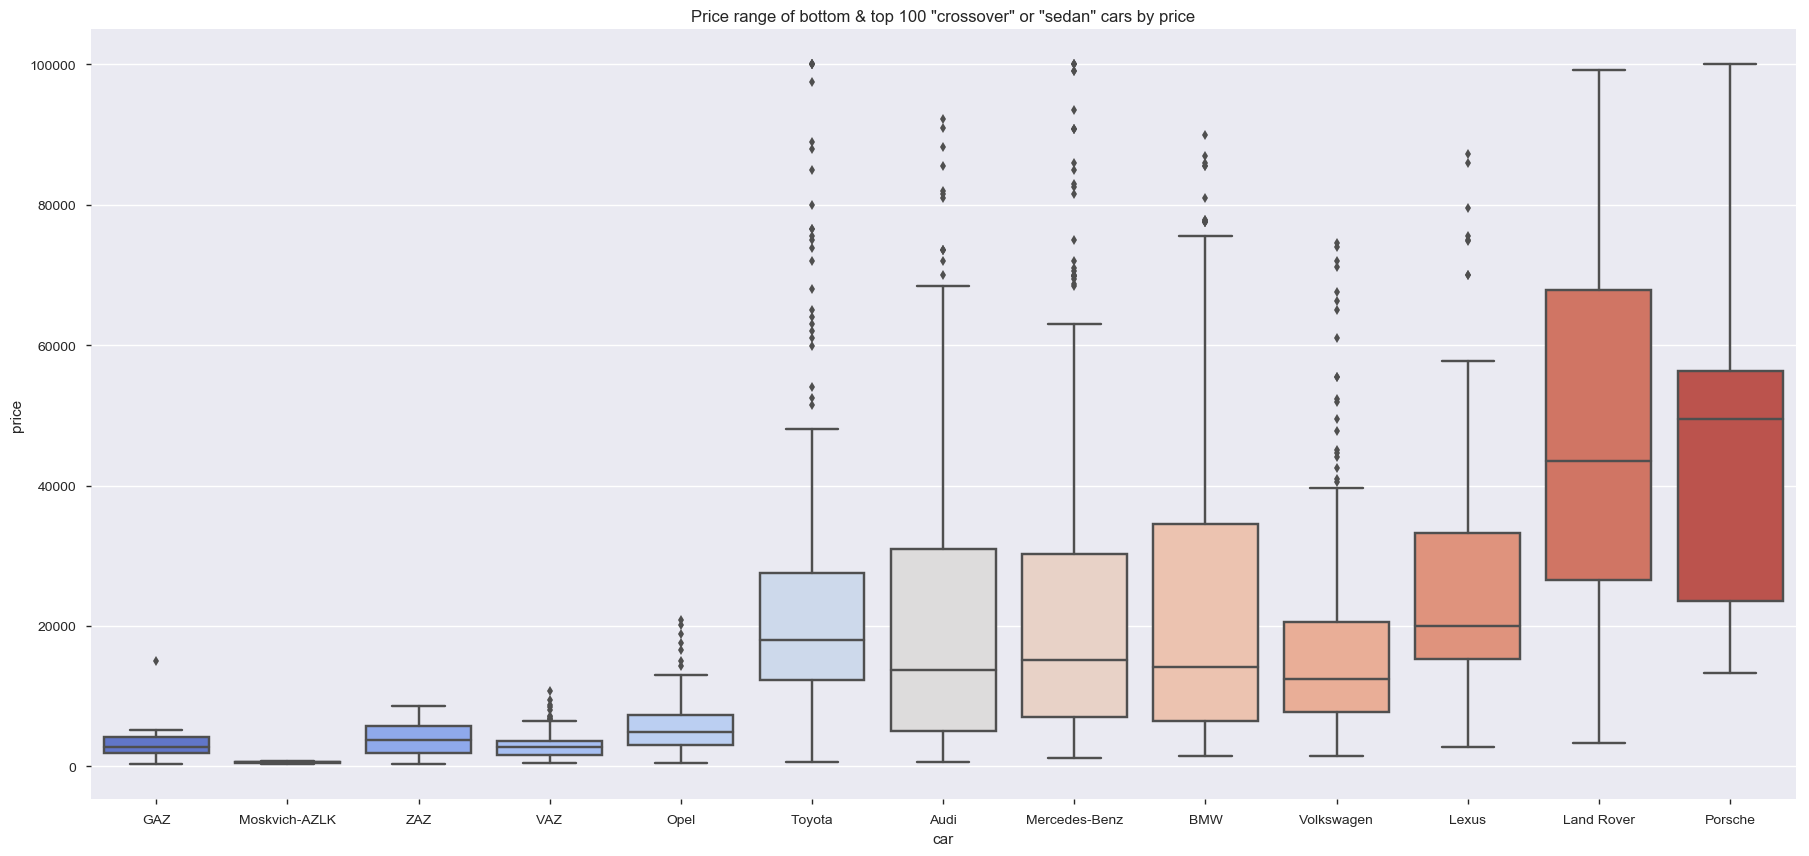

In [154]:
crossover_df = cars_clean[((cars_clean.body == 'crossover')|(cars_clean.body == 'sedan'))
                          &(cars_clean.price_cat != 'Extreme')][['car', 'price']].sort_values(by='price')
cheapest = crossover_df.head(100).car.unique()[:7]
costliest = crossover_df.tail(100).car.unique()[:7]
f,ax = plt.subplots(1,1,figsize=(22,10),sharey=True)
sns.boxplot(x ='car', y="price",data=crossover_df[crossover_df.car.isin(cheapest)|crossover_df.car.isin(costliest)],palette='coolwarm')
ax.set_title('Price range of bottom & top 100 "crossover" or "sedan" cars by price')
plt.show()


<b>Observation : Above graph shows that in crossover and Sedan cars, cars from "Audi", "BMW", "Mercedes-Benz", "Lexus", "Volkswagon", "Land Rover", "Porsche" etc. are in much higher price range as compared to cars from "GAZ", "Vaz", "ZAZ", "Moskvich-AZLK", "Opel" etc.</b> 

<a id='section4023'/>

##### 4.2.3 Cars from which manufacturars sale more? expensive or economy?

                    0
economy_count    1225
expensive_count  2080


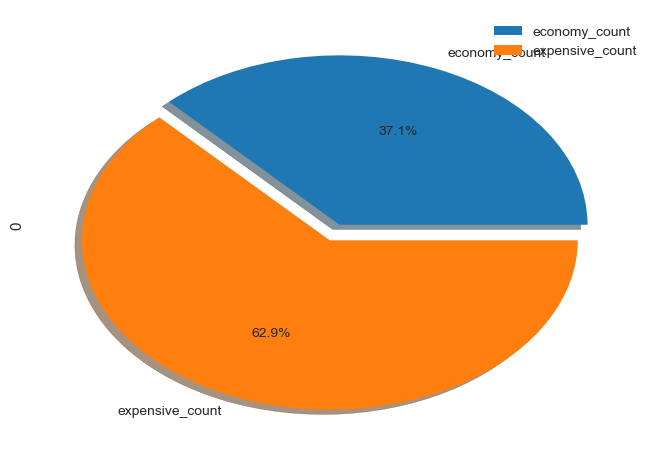

In [44]:
count_crossover = pd.pivot_table(crossover_df,index="car", values="price", aggfunc="count")
# print(count_crossover)
cheap_count = count_crossover.loc[cheapest].sort_values(by="price").price.sum()
expensive_count = count_crossover.loc[costliest].sort_values(by="price").price.sum()
dummy_df = pd.DataFrame([cheap_count,expensive_count])
dummy_df.index = ("economy_count", "expensive_count")
print(dummy_df)
dummy_df.plot.pie(y=0,explode=[0,0.1], shadow=True, autopct="%1.1f%%")
plt.show()

<b>Observation : For crossover/Sedan cars the market in not price sensitive, rather make of the car is of higher importance</b>


<a id='section4024'/>


##### 4.2.4 Price Distribution per body type where price is Extreme.

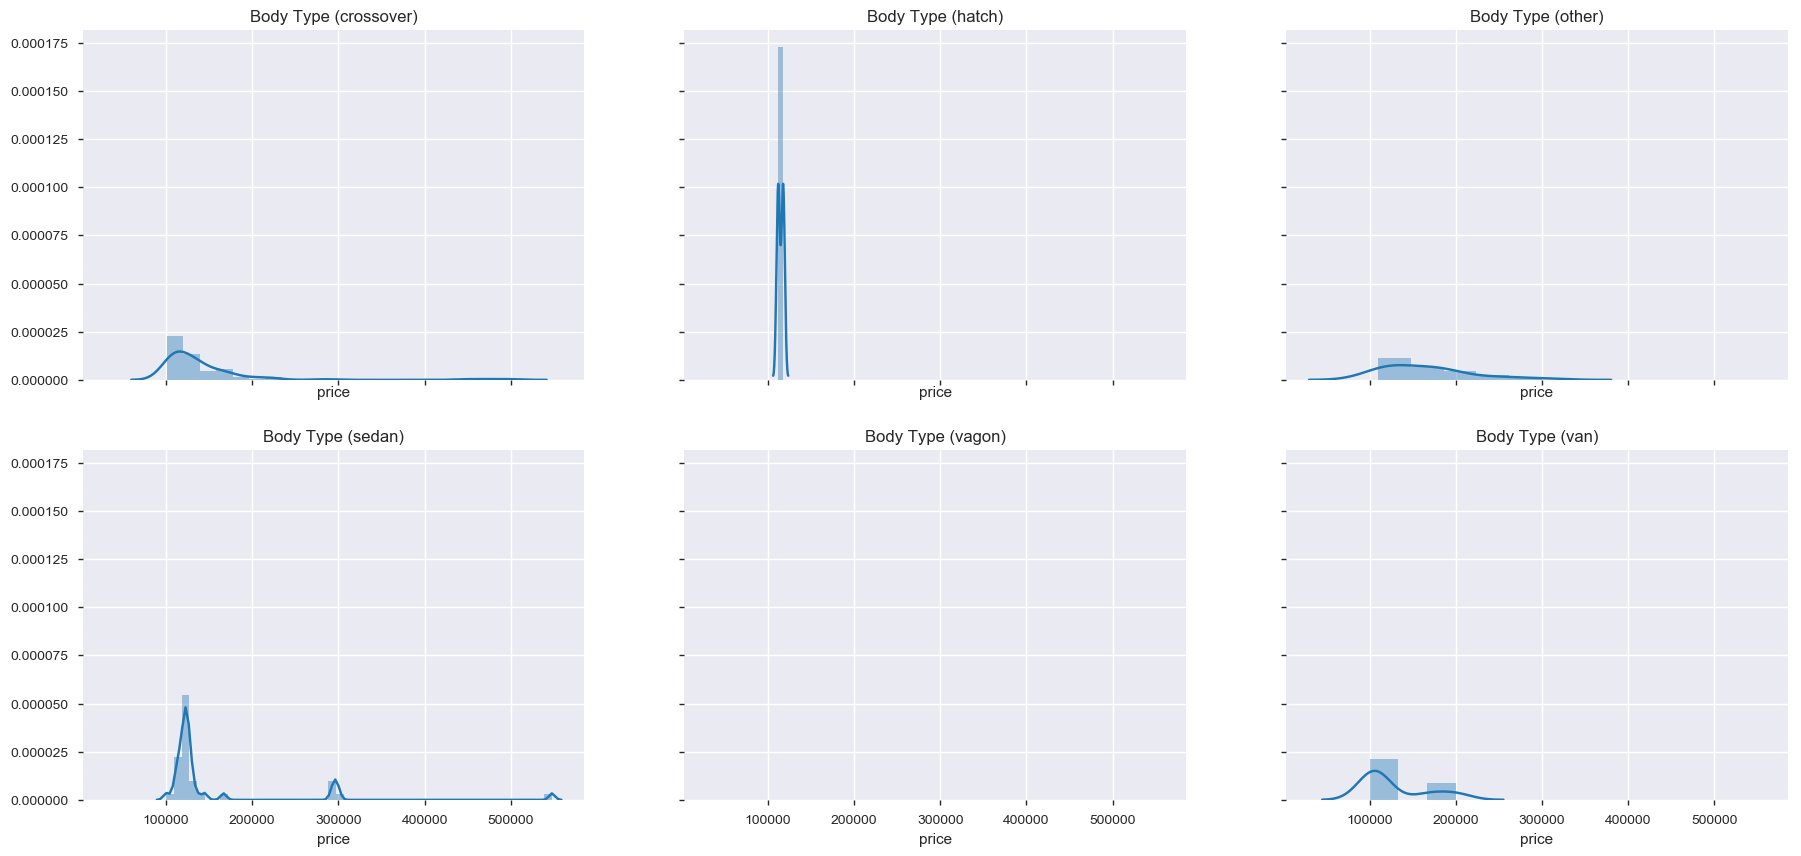

In [45]:
f,ax = plt.subplots(2,3,figsize=(22,10),sharex=True,sharey=True)

row = 0
for index, body in enumerate(bodyTypes):
    if index < 3:
        sns.distplot(cars_clean[(cars_clean.body == body)&(cars_clean.price_cat == 'Extreme')].price,ax=ax[row,index])
        title = 'Body Type ({0})'.format(body)
        ax[row,index].set_title(title)
    else:
        sns.distplot(cars_clean[(cars_clean.body == body)&(cars_clean.price_cat == 'Extreme')].price,ax=ax[row+1,index-3])
        ax[row+1,index-3].set_title('Body Type ({0})'.format(body))

<b>Observation : data is not substential enough to arrive at any conclusion for extremely priced cars.</b>


<a id='section4025'/>

##### 4.2.5 Price Distribution based on drive type and engine volume categories.

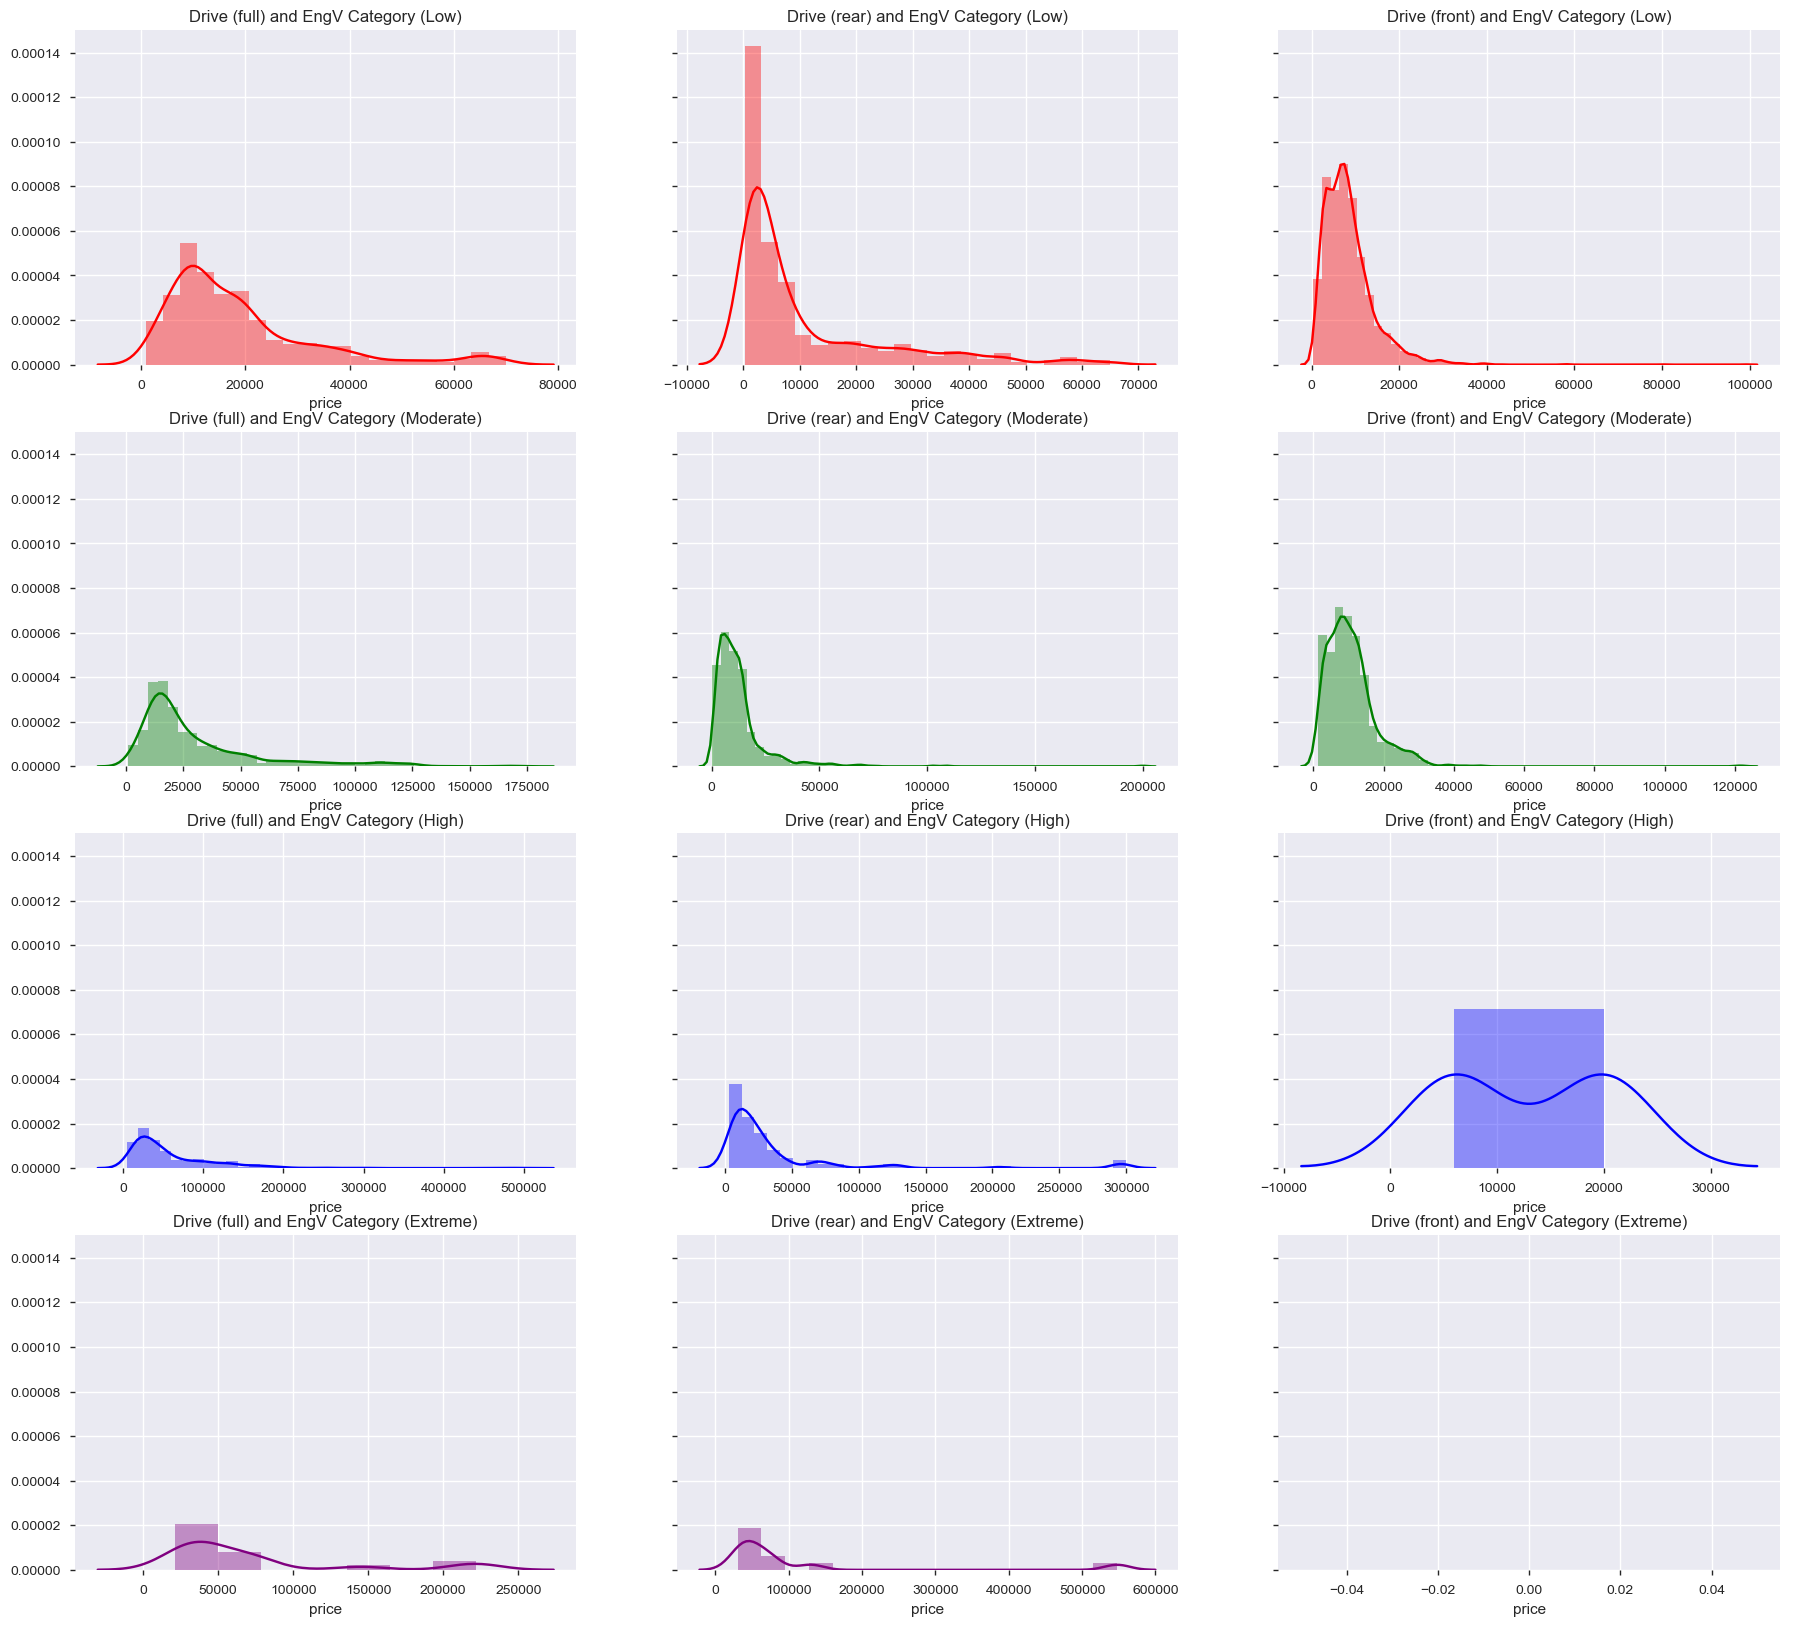

In [78]:
engV_cats = cars_clean.engV_cat.unique()
drives = cars_clean.drive.unique()
# print(drives, engV_cats)
engv_colours = ['RED','GREEN','BLUE','PURPLE']
f,ax = plt.subplots(4,3,figsize=(22,20),sharey=True)
for index1, engv in enumerate(engV_cats.sort_values()):
    for index2, drive in enumerate(drives):
#         print("Category engv : {0} at index {1}".format(engv,index1) + ", Category drive : {0} at index {1}".format(drive, index2))
        sns.distplot(cars_clean[(cars_clean.drive == drive)&
                                (cars_clean.engV_cat == engv)].price,
                     ax=ax[index1,index2],
                     color=engv_colours[index1])
        ax[index1,index2].set_title('Drive ({0}) and EngV Category ({1})'.format(drive, engv))

<b>Observations:</b>
- Most cars with front drive are of Low or Moderate Engine Volume.
- High and Extreme Engine volume cars are generally Front or Full drive types.
- Full Drive cars are expensive in the respective engine volume categories. e.g. 
    - for Low Engine Volume cars, Full Drive cars have median price ~10000 USD with higher standard diviation where as Front and Rear Drive have median price ~5-6000 USD with lower SD.
    - for Moderate Engine Volume cars, Full Drive cars have median price ~18-20000 USD with higher standard diviation where as Front and Rear Drive have median price ~10000 USD with lower SD.
    - for High Engine Volume cars, Full Drive cars have median price ~25-30000 USD with higher standard diviation where as Rear Drive have median price ~10000 USD with lower SD. (Very few cars with Fornt drive)
    - for Extreme Engine Volume cars, Very few cars thus ignored.


price_cat
Low         1.6
Moderate    2.2
High        3.0
Extreme     4.4
Name: engV, dtype: float64


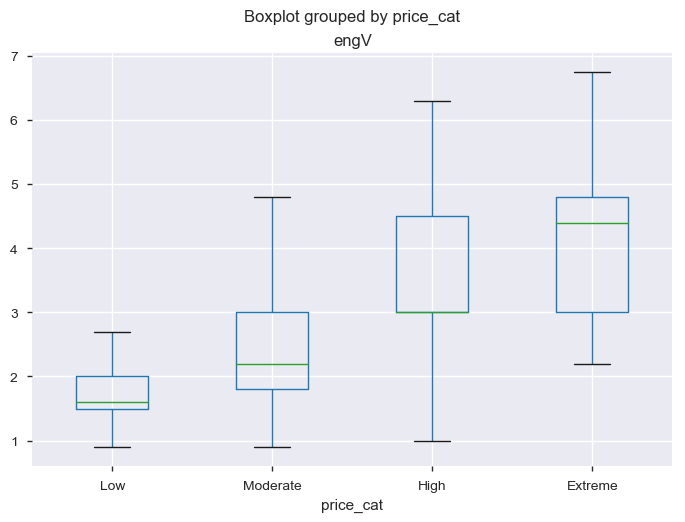

In [117]:
price_cars = cars_clean.groupby(by=['price_cat'])
print(price_cars.engV.median())
cars_clean.boxplot(column=["engV"], by="price_cat")
plt.show()

<b>Observation:</b> Above chart clearly shows that the price is dependent on the engine volume as the median Engine Volume increases as the price category increases.

drive
front     7650.0
full     19999.0
rear      8350.0
Name: price, dtype: float64


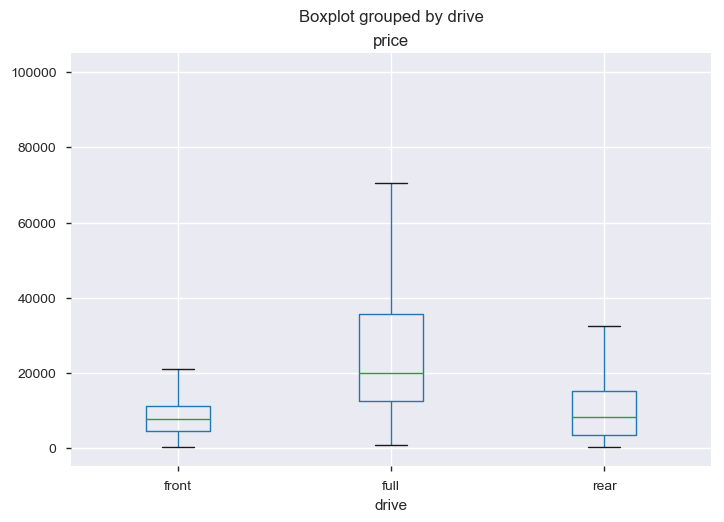

In [123]:
drive_cars = cars_clean[cars_clean.price_cat != "Extreme"].groupby(by=['drive'])
print(drive_cars.price.median())
cars_clean[cars_clean.price_cat != "Extreme"].boxplot(column=["price"], by="drive",)
plt.show()

<b>Observation: </b> Based on the above we can say that the car price is relatively higher for full drive cars compared to Front or Rear drive cars.

<a id='section4026'/>

##### 4.2.6 Price distribution based on age groups

[Low, Moderate, High, Extreme]
Categories (4, object): [Low < Moderate < High < Extreme]
[0-1, 1-3, 3-6, 6-10, 10-29, 30+]
Categories (6, object): [0-1 < 1-3 < 3-6 < 6-10 < 10-29 < 30+]


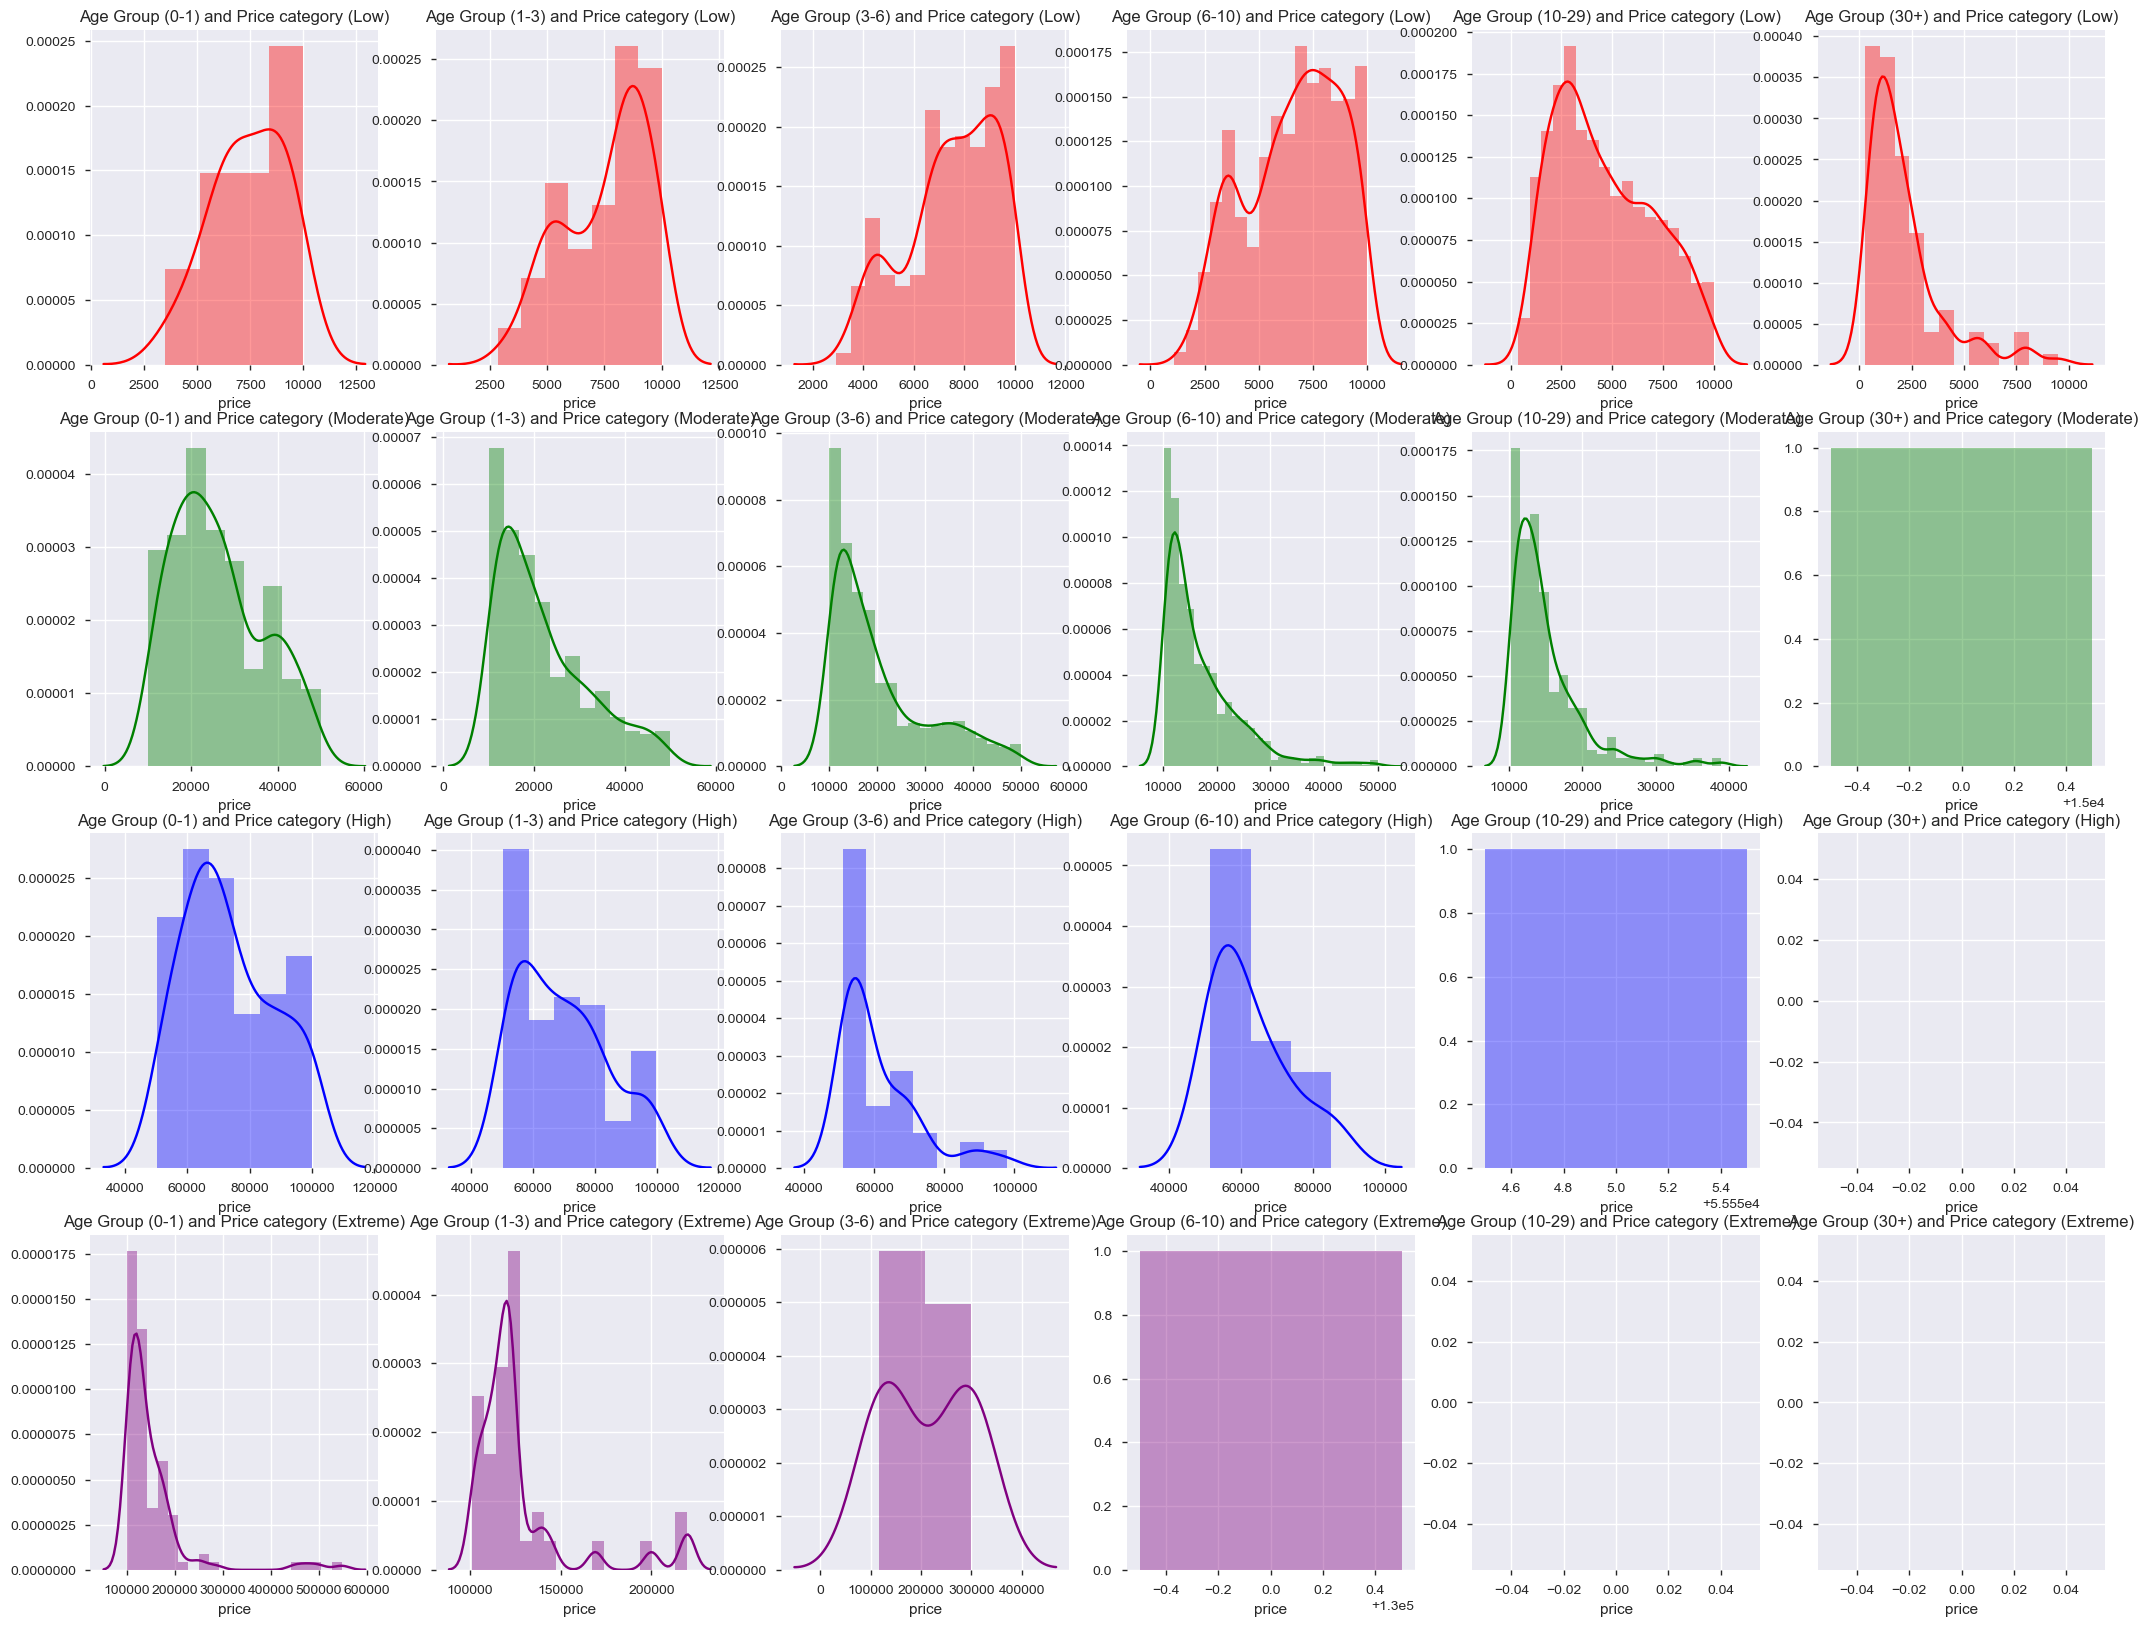

In [77]:
price_cats = cars_clean.price_cat.unique().sort_values()
age_groups = cars_clean.age_Group.unique().sort_values()

print(price_cats)
print(age_groups)
price_colours = ['RED','GREEN','BLUE','PURPLE']
f,ax = plt.subplots(4,6,figsize=(26,20))
for index1, price_cat in enumerate(price_cats):
    for index2, age_group in enumerate(age_groups):
#         print(index1, price_cat,index2, age_group)
#         print(cars_clean[(cars_clean.age_Group == age_group)&(cars_clean.price_cat == price_cat)].price.value_counts())
        sns.distplot(cars_clean[(cars_clean.age_Group == age_group)&(cars_clean.price_cat == price_cat)].price,ax=ax[index1,index2],color=price_colours[index1])
        ax[index1,index2].set_title('Age Group ({0}) and Price category ({1})'.format(age_group, price_cat))
#     plt.show()



<b>Observations:</b>
- for lower age groups, the distributions are skewed towards higher price with Platy/Meso kurtic distribution as compared to higher age groups where distributions are skewed towards lower prices with leptokurtic distribution in their respective Price categories.
    - this indicates that age does have impact of the price for lower priced cars.
- Most cars in Extreme price category are in age groups 0-3 years. Very few cars are more than 6 years.
- Most cars grater than 30 years age are in low price category.
- As the age of the car increases the median price value reduces for Low, Moderate and High price categories, 
    - But for Extreme price category the reverse trend can be seen i.e.
        - for 0-1 year cars median price is ~110000 USD
        - for 1-3 year cars median price is ~130000 USD
        - for 3-6 year cars median price is ~200000 USD
<a id='section4027'/>

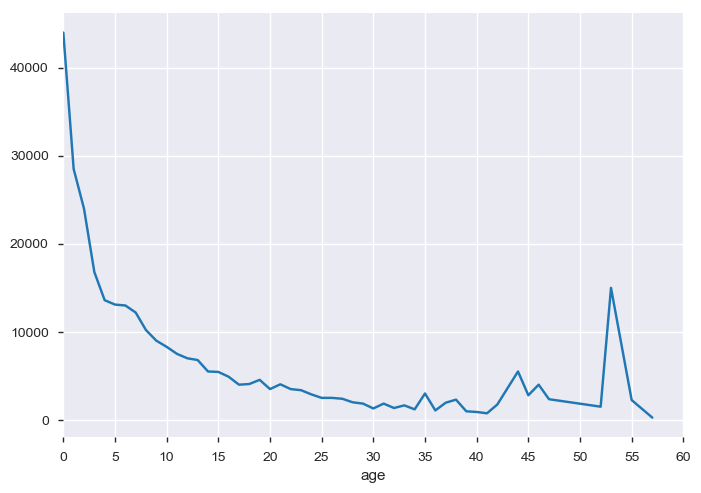

In [79]:
age_cars = cars_clean.groupby(by='age')
lp = age_cars.price.median().plot.line()
lp.set(xlim=(0,60),xticks=np.arange(0,65,5))
plt.show()

<a id='section4027'/>

##### 4.2.7 Heatmap based on engV Category.

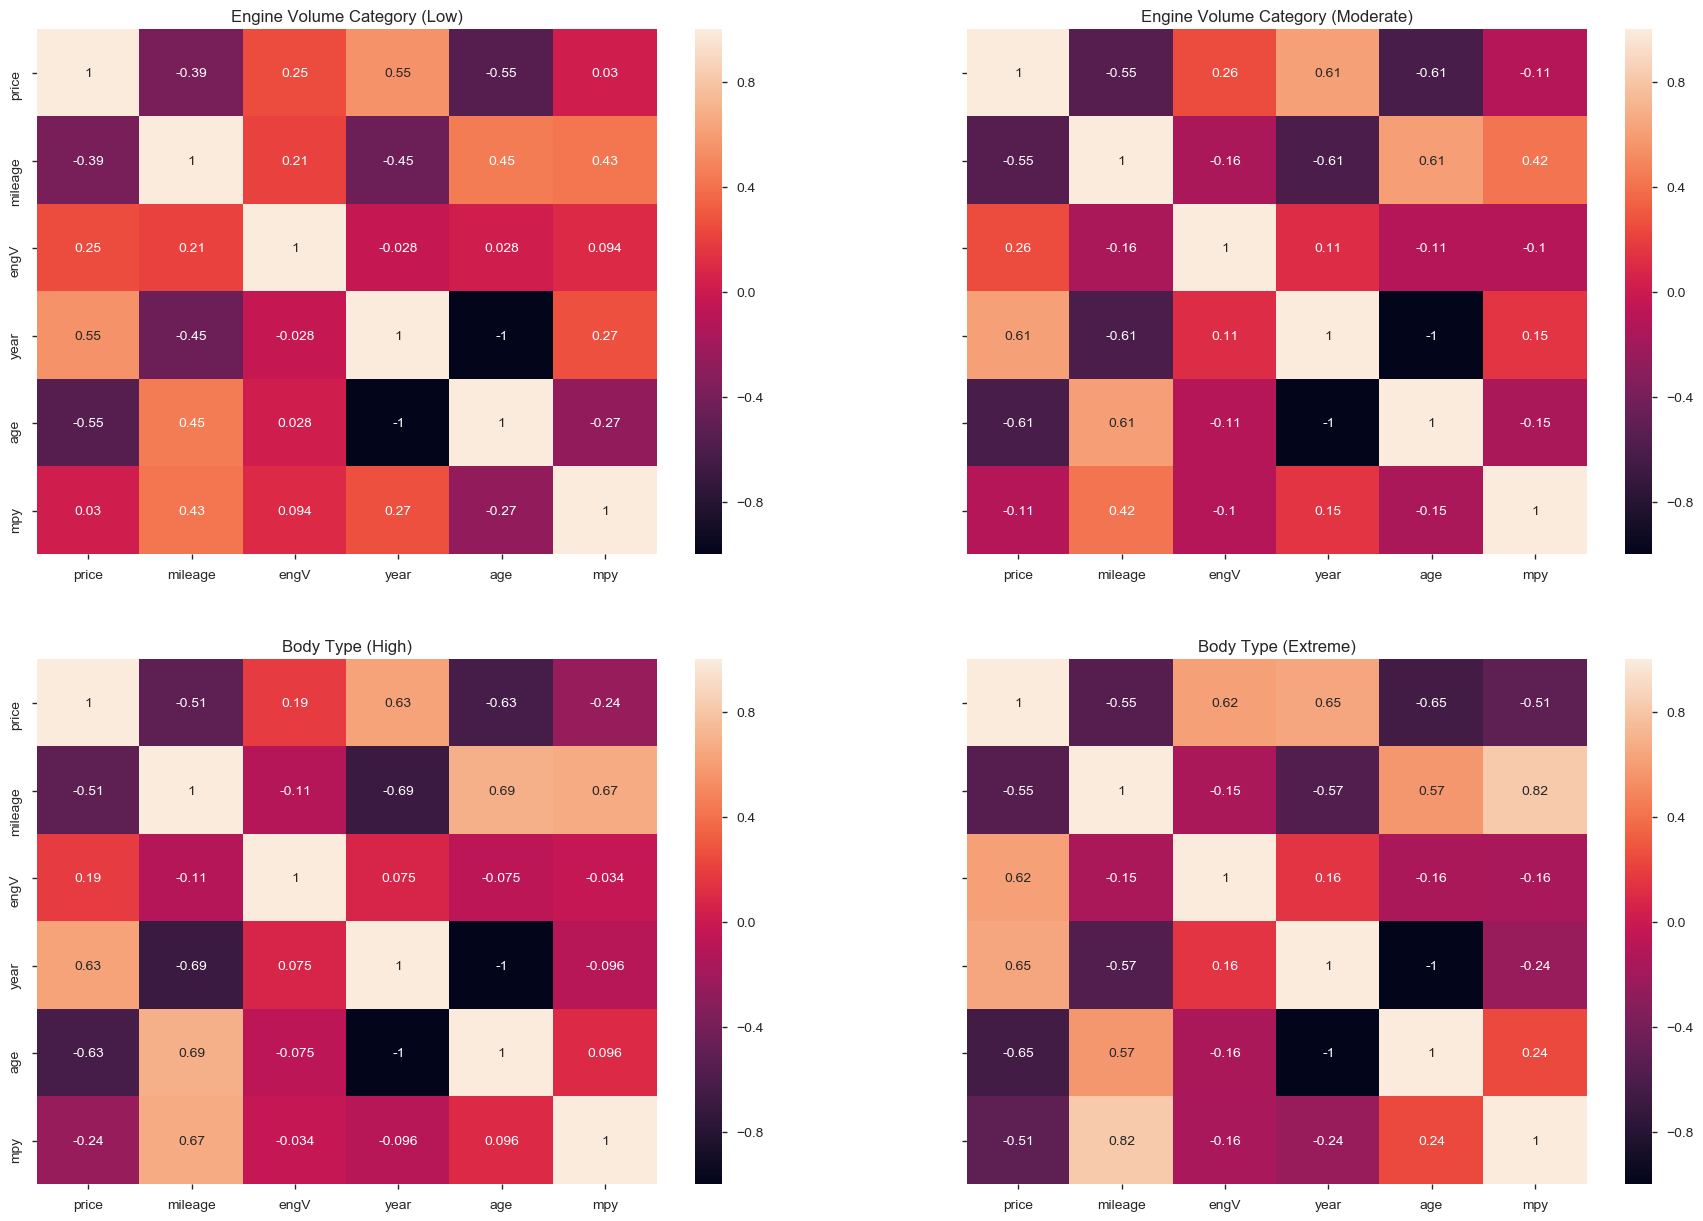

In [48]:
f,ax = plt.subplots(2,2,figsize=(22,15),sharey=True)
row = 0
for index, engVc in enumerate(engV_cats.sort_values()):
    if index < 2:
        sns.heatmap(cars_clean[cars_clean.engV_cat == engVc].corr(),annot=True,ax=ax[row,index])
        ax[row,index].set_title('Engine Volume Category ({0})'.format(engVc))
    else:
        sns.heatmap(cars_clean[cars_clean.engV_cat == engVc].corr(),annot=True,ax=ax[row+1,index-2])
        ax[row+1,index-2].set_title('Body Type ({0})'.format(engVc))

##### Observations based on above are 
- For Low Engine volume Cars, price has high -ve correlation with age and moderate +ve/-ve correlation to engine volume and Milage.
- For Moderate Engine volume Cars, price has high -ve correlation with age and milage and moderate +ve correlation to engine volume.
- For High Engine volume Cars, price has high -ve correlation with age and milage and moderate +ve correlation to engine volume.
- For Extreme Engine volume Cars, price has high +ve/-ve correlation with age, milage and engine volume.
- Milage and Age are highly correlated for all the categories.
- Engine Volume and Age has very low correlation for any of the categories.

Correlation 
- 0 - 0.2 is Low
- 0.2 - 0.4 is Moderate
- 0.4+ is High

<a id='section4028'/>

##### 4.2.8 Heatmap based on body type.

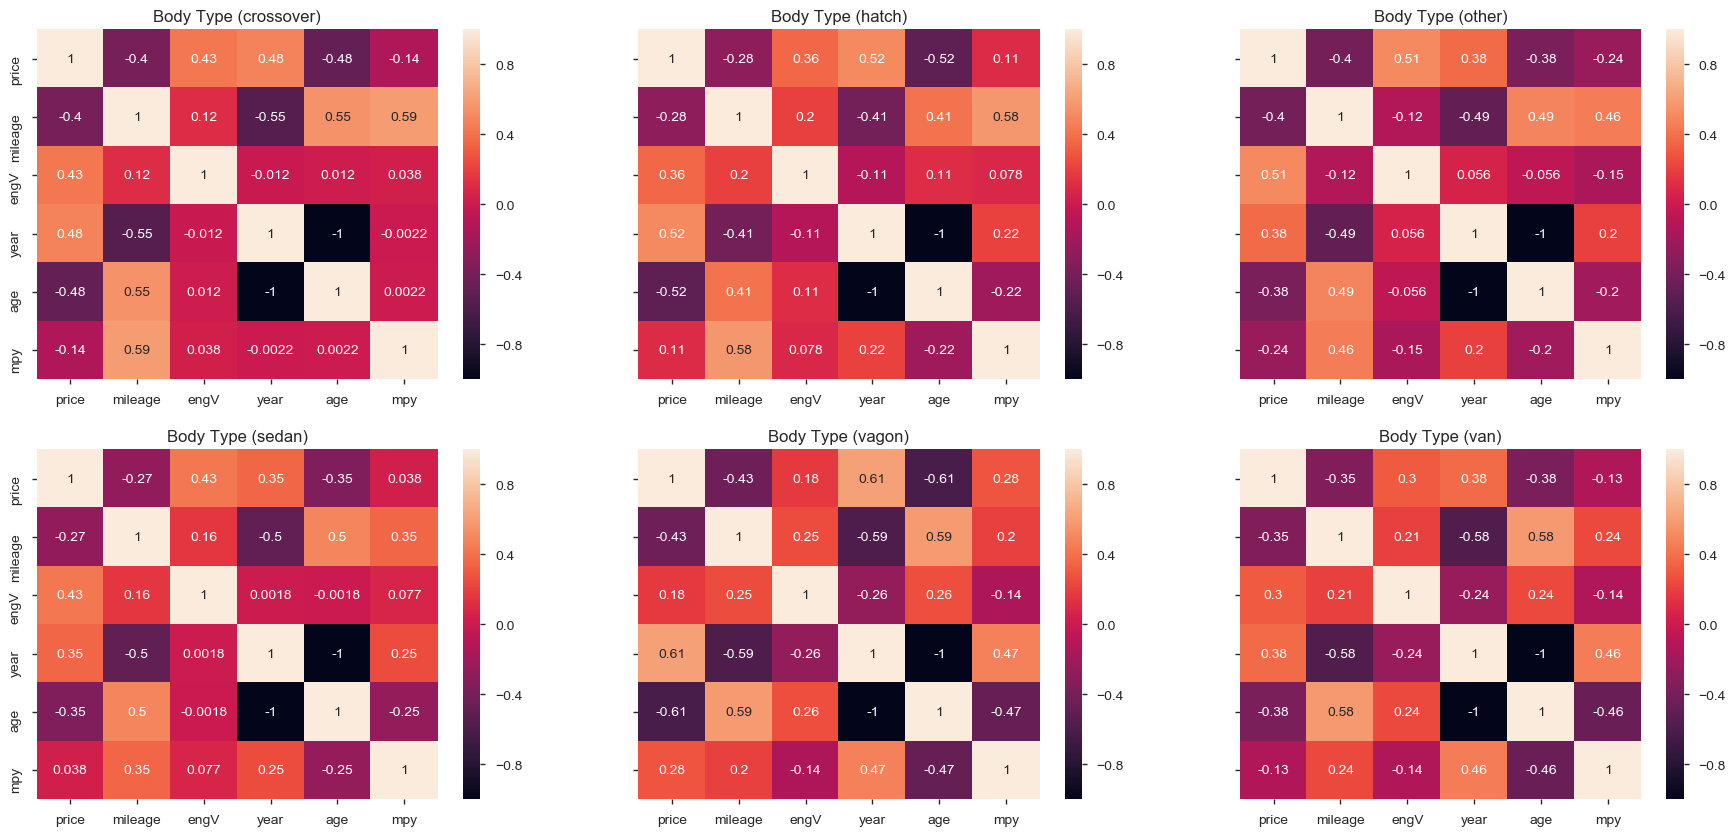

In [49]:
f,ax = plt.subplots(2,3,figsize=(22,10),sharey=True)
row = 0
for index, body in enumerate(bodyTypes):
    if index < 3:
        sns.heatmap(cars_clean[cars_clean.body == body].corr(),annot=True,ax=ax[row,index])
        ax[row,index].set_title('Body Type ({0})'.format(body))
    else:
        sns.heatmap(cars_clean[cars_clean.body == body].corr(),annot=True,ax=ax[row+1,index-3])
        ax[row+1,index-3].set_title('Body Type ({0})'.format(body))

##### Observations based on above are 
- Price for Crossover Cars is Highly correlated with Age, Engine Volume and Mileage
- Price for Sedan Cars is highly correlated with Engine Volume and moderately correlated with  Age and Mileage
- Price for Hatch Cars is highly correlated with Age and moderately correlated with Engine Volume and Mileage
- Price for Vagon Cars is highly correlated with Age and Mileage and Mildly correlated with Engine Volume
- Price for Van Cars is moderately correlated with Age, Engine Volume and Mileage
- Price for other Cars is moderately correlated with Age, Engine Volume and Mileage

Correlation 
- 0 - 0.2 is Low
- 0.2 - 0.4 is Moderate
- 0.4+ is High

<a id='section4029'/>

##### 4.2.9 Heatmap based on age groups.

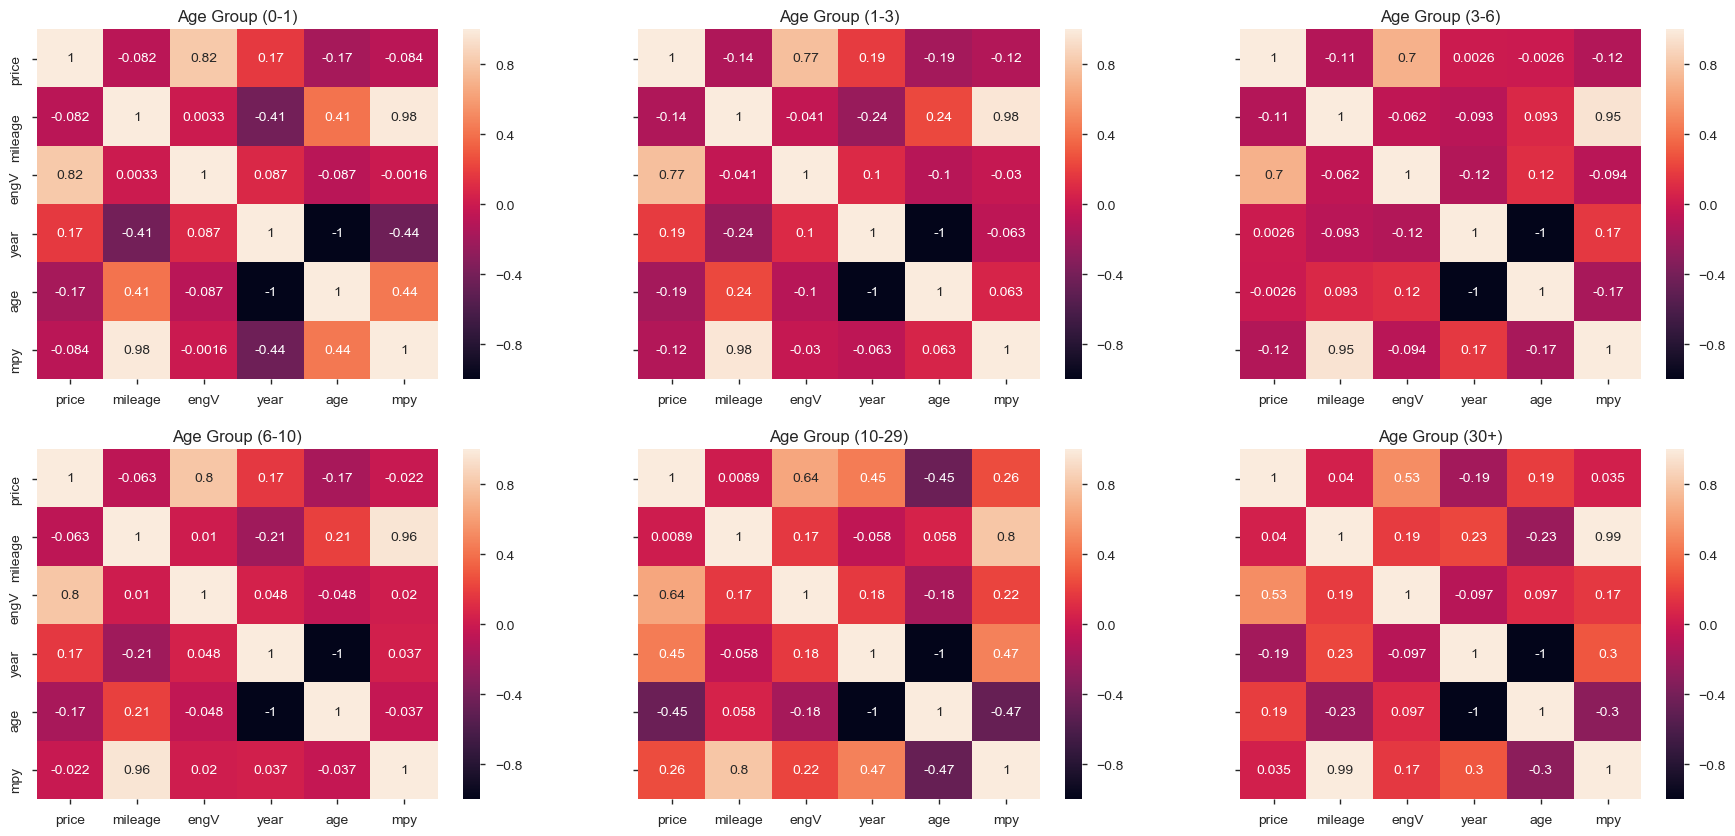

In [50]:
f,ax = plt.subplots(2,3,figsize=(22,10),sharey=True)
age_groups = cars_clean.age_Group.unique().sort_values()
row = 0
for index, age in enumerate(age_groups):
    if index < 3:
        sns.heatmap(cars_clean[cars_clean.age_Group == age].corr(),annot=True,ax=ax[row,index])
        ax[row,index].set_title('Age Group ({0})'.format(age))
    else:
        sns.heatmap(cars_clean[cars_clean.age_Group == age].corr(),annot=True,ax=ax[row+1,index-3])
        ax[row+1,index-3].set_title('Age Group ({0})'.format(age))

##### Observations based on above are 
- for Ages below 10 years price is mildly -ve correlated with age, but above 10 Years and below 30 years price is highly negatively correlated with Age. though ages above 30 price has +ve correlation with age.
- Mileage is highly positively correlated with price at any age. though with ages below 10 years it has extremely high correlation greater than 0.7

Correlation 
- 0 - 0.2 is Low
- 0.2 - 0.4 is Moderate
- 0.4 - 0.7 is High
- 0.7 +     is Extreme

<a id='section40210'/>

##### 4.2.10 Heatmap based on price categories.

[Low, Moderate, High, Extreme]
Categories (4, object): [Low < Moderate < High < Extreme]


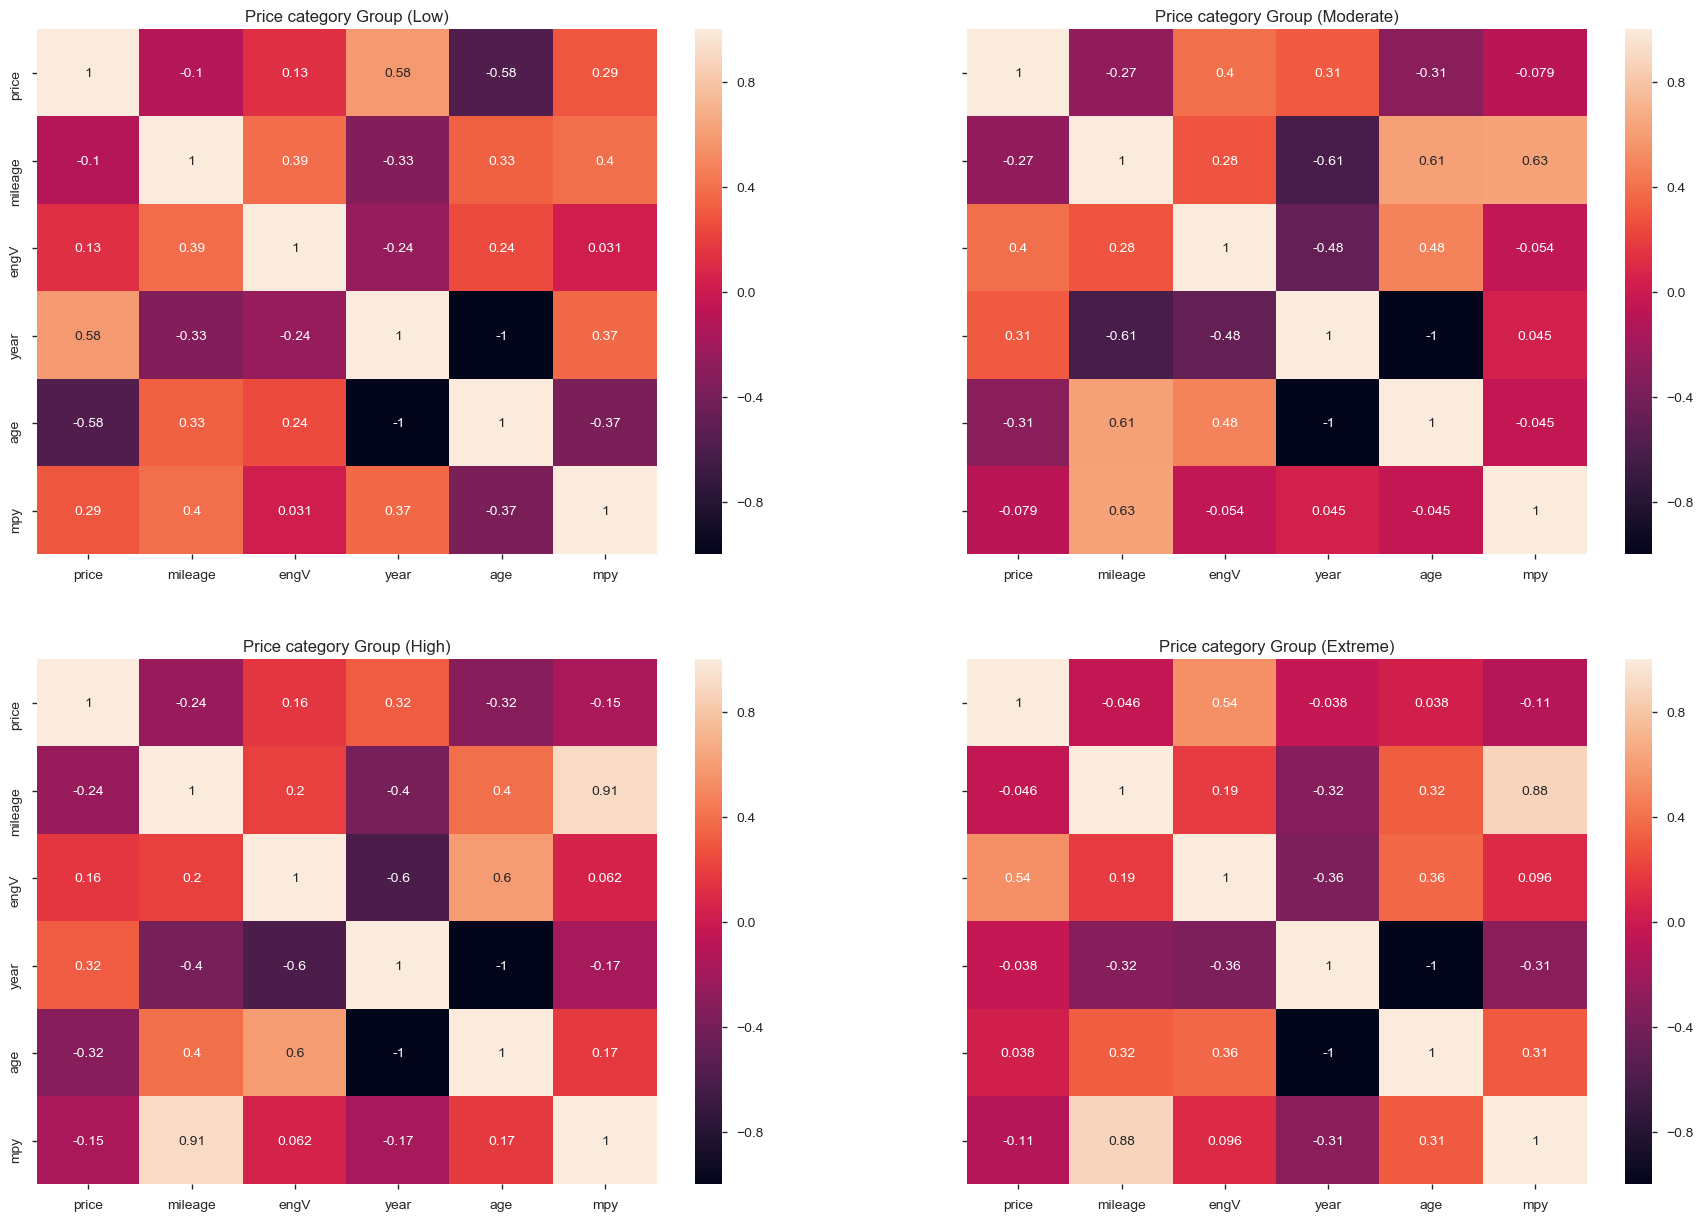

In [51]:
f,ax = plt.subplots(2,2,figsize=(22,15),sharey=True)
prices = cars_clean.price_cat.unique().sort_values()
print(prices)
row = 0
columns = 2
for index, price in enumerate(prices):
    if index < columns:
        sns.heatmap(cars_clean[cars_clean.price_cat == price].corr(),annot=True,ax=ax[row,index])
        ax[row,index].set_title('Price category Group ({0})'.format(price))
    else:
        sns.heatmap(cars_clean[cars_clean.price_cat == price].corr(),annot=True,ax=ax[row+1,index-columns])
        ax[row+1,index-columns].set_title('Price category Group ({0})'.format(price))

##### Observations based on above are 
- Extremely priced cars have very high +ve price correlation with Engine Volume and very low correlation with Mileage or Age.
- Highly priced cars have moderate +ve or -ve price correlation with Engine volume, Age and Mileage.
- Moderately priced cars have high +ve or -ve price correlation with Engine volume, Age and Mileage.
- Low priced cars have high -ve price correlation with Age but moderate correlation with Engine volume and Mileage.

##### 4.2.11 Price relationship with mileage and mileage/year

price_cat
Low         162.0
Moderate    109.0
High         29.0
Extreme       2.5
Name: mileage, dtype: float64


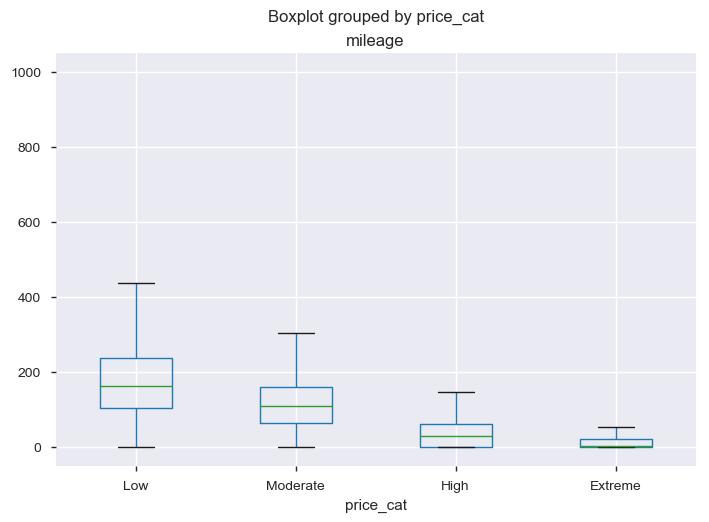

In [131]:
drive_cars = cars_clean.groupby(by=['price_cat'])
print(drive_cars.mileage.median())
cars_clean.boxplot(column=["mileage"], by="price_cat",)
plt.show()

price_cat
Low         15.00
Moderate    17.43
High        10.75
Extreme      0.00
Name: mpy, dtype: float64


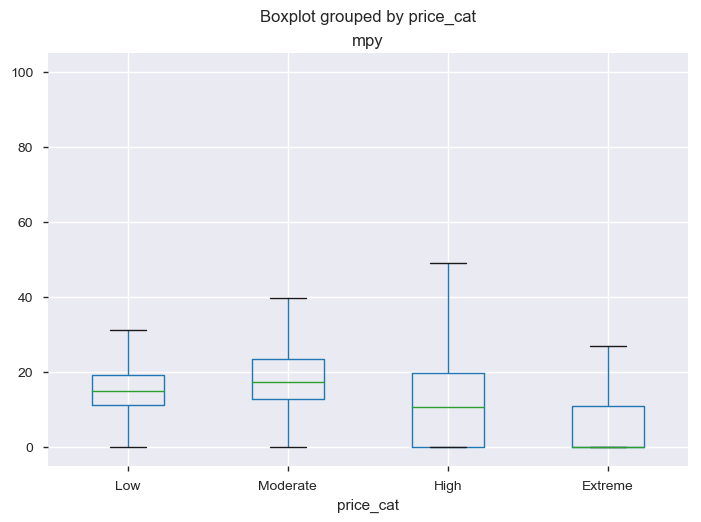

In [136]:
drive_cars = cars_clean[cars_clean.mpy <= 100].groupby(by=['price_cat'])
print(drive_cars.mpy.median())
cars_clean[cars_clean.mpy <= 100].boxplot(column=["mpy"], by="price_cat")
plt.show()

<b>Observation: </b> 
- Based on the above charts higher the mileage price is lower.
- Though mileage/year does not seem to impact the price greatly. (if we ignore extreme price category)

[^ TOP](#top)<br>
<a id='section5'/>

### 5. Hypothesis

<a id='section51'/>
#### 5.1 Hypothesis 1 : Used car price is dependent on Age. 

- for lower age groups, the distributions are skewed towards higher price with Platy/Meso kurtic distribution as compared to higher age groups where distributions are skewed towards lower prices with leptokurtic distribution in their respective Price categories.
    - this indicates that age does have impact of the price for lower priced cars.
- Most cars in Extreme price category are in age groups 0-3 years. Very few cars are more than 6 years.
- Most cars grater than 30 years age are in low price category.
- As the age of the car increases the median price value reduces for Low, Moderate and High price categories, 
    - But for Extreme price category the reverse trend can be seen i.e.
        - for 0-1 year cars median price is ~110000 USD
        - for 1-3 year cars median price is ~130000 USD
        - for 3-6 year cars median price is ~200000 USD
        
- <b>Assumptions</b> as the extreme price category the cars are new we can ignore this category for this analysis.

<b>Based on the above observations it is clear that the Price of the car reduces as the age of the car increases. Thus we accept this hypothesis</b>

<a id='section52'/>
#### 5.2 Hypothesis 2 : Used car price is dependent on Engine Volume. 

<b>Baased on analysis median Engine Volume increases as the price category increases. Thus we accept this Hypothesis</b>

<a id='section53'/>
#### 5.3 Hypothesis 3 : Used car price is dependent on Mileage. 

- Based on the above analysis higher the mileage price is lower.
- Though mileage/year does not seem to impact the price greatly.

<b>Thus we can accept this hypothesis that price is dependent on the Mileage</b>

<a id='section54'/>
#### 5.4 Hypothesis 4 : Used car price is dependent on drive type. 

- Most cars with front drive are of Low or Moderate Engine Volume.
- High and Extreme Engine volume cars are generally Front or Full drive types.
- Full Drive cars are expensive in the respective engine volume categories. e.g. 
    - for Low Engine Volume cars, Full Drive cars have median price ~10000 USD with higher standard diviation where as Front and Rear Drive have median price ~5-6000 USD with lower SD.
    - for Moderate Engine Volume cars, Full Drive cars have median price ~18-20000 USD with higher standard diviation where as Front and Rear Drive have median price ~10000 USD with lower SD.
    - for High Engine Volume cars, Full Drive cars have median price ~25-30000 USD with higher standard diviation where as Rear Drive have median price ~10000 USD with lower SD. (Very few cars with Fornt drive)
    - for Extreme Engine Volume cars, Very few cars thus ignored.

<b>Based on the above analysis we can say that full drive type cars are more expensive than Front or Rear drive type cars. thus we accept this hypothesis</b>

<a id='section55'/>
#### 5.5 Hypothesis 5 : Used car price is dependent on Body type. 

- For Crossover/Sedan cars the market in not price sensitive, rather make of the car is of higher importance
- Crossovers have overall better average resale price compared to other cars.

    - Crossover and Sedans have wider price ranges. (Some make of the cars seems to have better resale value compared to others)
    - crossover and Sedan cars, cars from "Audi", "BMW", "Mercedes-Benz", "Lexus", "Volkswagon", "Land Rover", "Porsche" etc. are in much higher price range as compared to cars from "GAZ", "Vaz", "ZAZ", "Moskvich-AZLK", "Opel" etc.
- Sedan and Vagons have relatively lowest average resale price.<br>

<b>Assumption</b>
Ignoring the Extreme Priced cases for this analysis as these are outliers

- <b>Based on the above observations we can conclude that the Body type does have impact on car price and thus we accept the hypothesis.</b>

<a id='section56'/>
#### 5.6 Hypothesis 6 : Milage/year for the car increases over years.

- Based on the available data, it is proved that mileage/year does increase for cars less than 4 years of age but for older cars the milage/year decreases and cars older than 30 years have substentially lower mileage/year compared to newer cars. 
- <b>Thus rejecting this hypothesis.</b>



[^ TOP](#top)<br>
<a id='section6'/>

### 6 Conclusions

### Based on the above we can say that price of the used car depends on Age, Engine volume, Mileage, Body type and drive type. 

[^ TOP](#top)<br>

#### Other analysis (Rough)

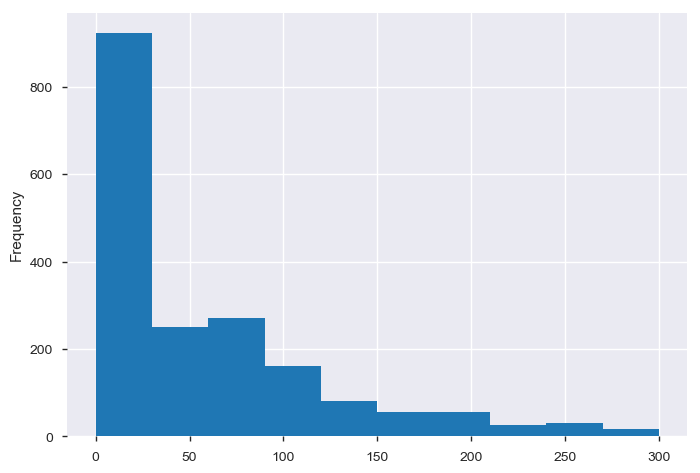

In [52]:
cars_clean[cars_clean.mpy_cat == 'Low'].mileage.plot.hist()

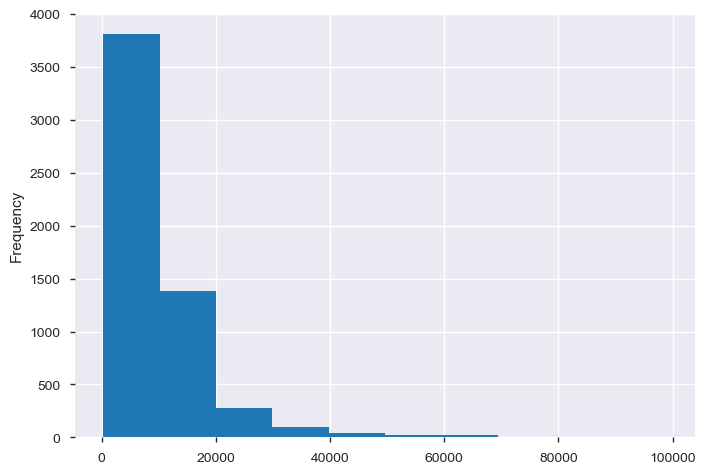

In [53]:
cars_clean[cars_clean.engV_cat == 'Low'].price.plot.hist()

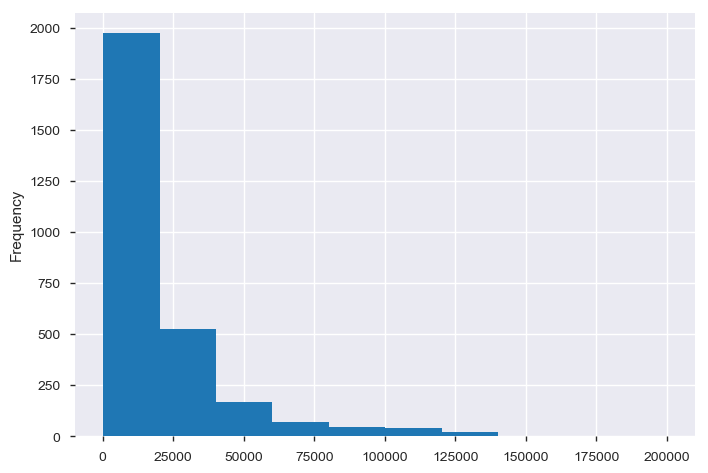

In [54]:
cars_clean[cars_clean.engV_cat == 'Moderate'].price.plot.hist()

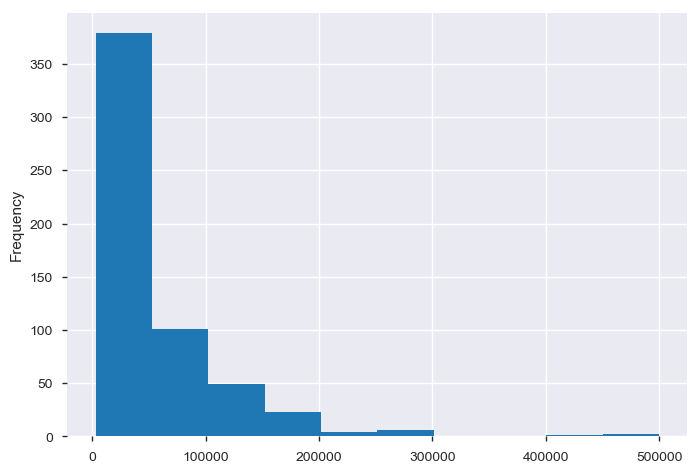

In [55]:
cars_clean[cars_clean.engV_cat == 'High'].price.plot.hist()

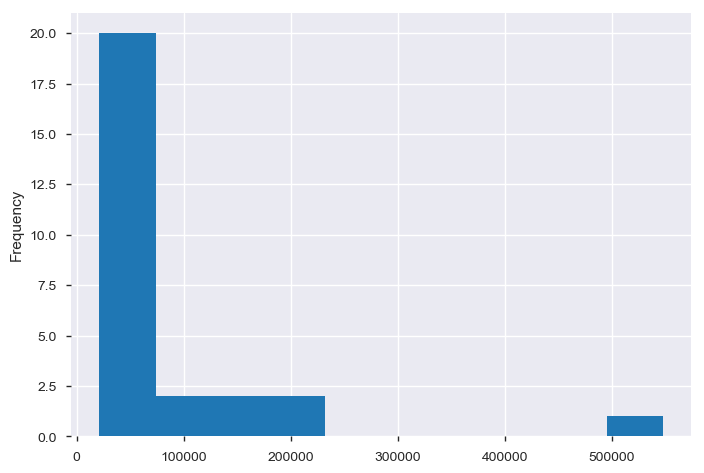

In [56]:
cars_clean[cars_clean.engV_cat == 'Extreme'].price.plot.hist()

### Bivariate Ploting of variables.

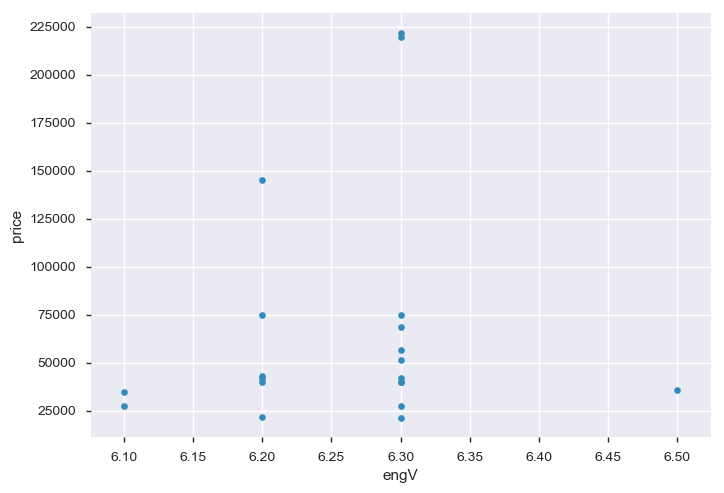

In [57]:
cars_clean[cars_clean.engV_cat == 'Extreme'].sample(20).plot.scatter(x='engV', y='price')

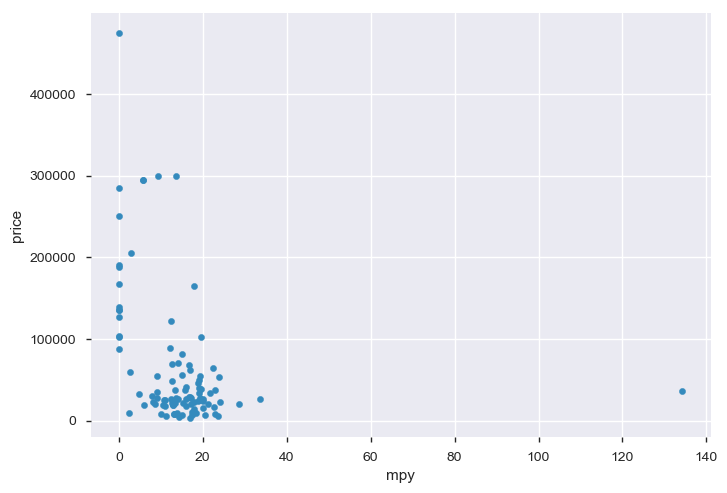

In [58]:
cars_clean[cars_clean.engV_cat == 'High'].sample(100).plot.scatter(x='mpy', y='price')

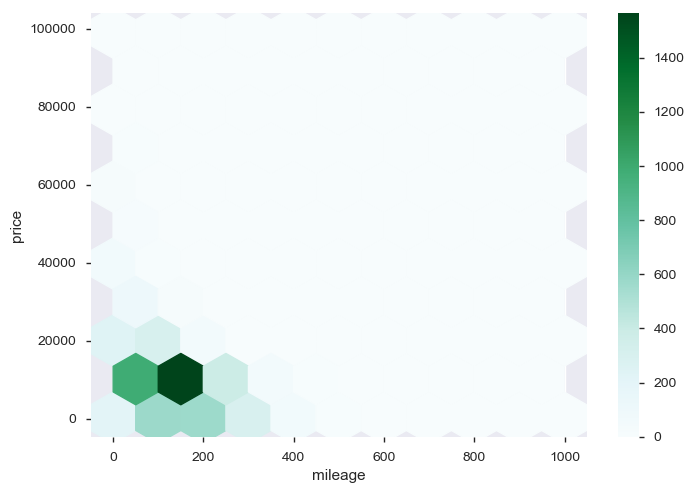

In [59]:
cars_clean[cars_clean.engV_cat == 'Low'].plot.hexbin(x='mileage',y='price',gridsize=10)

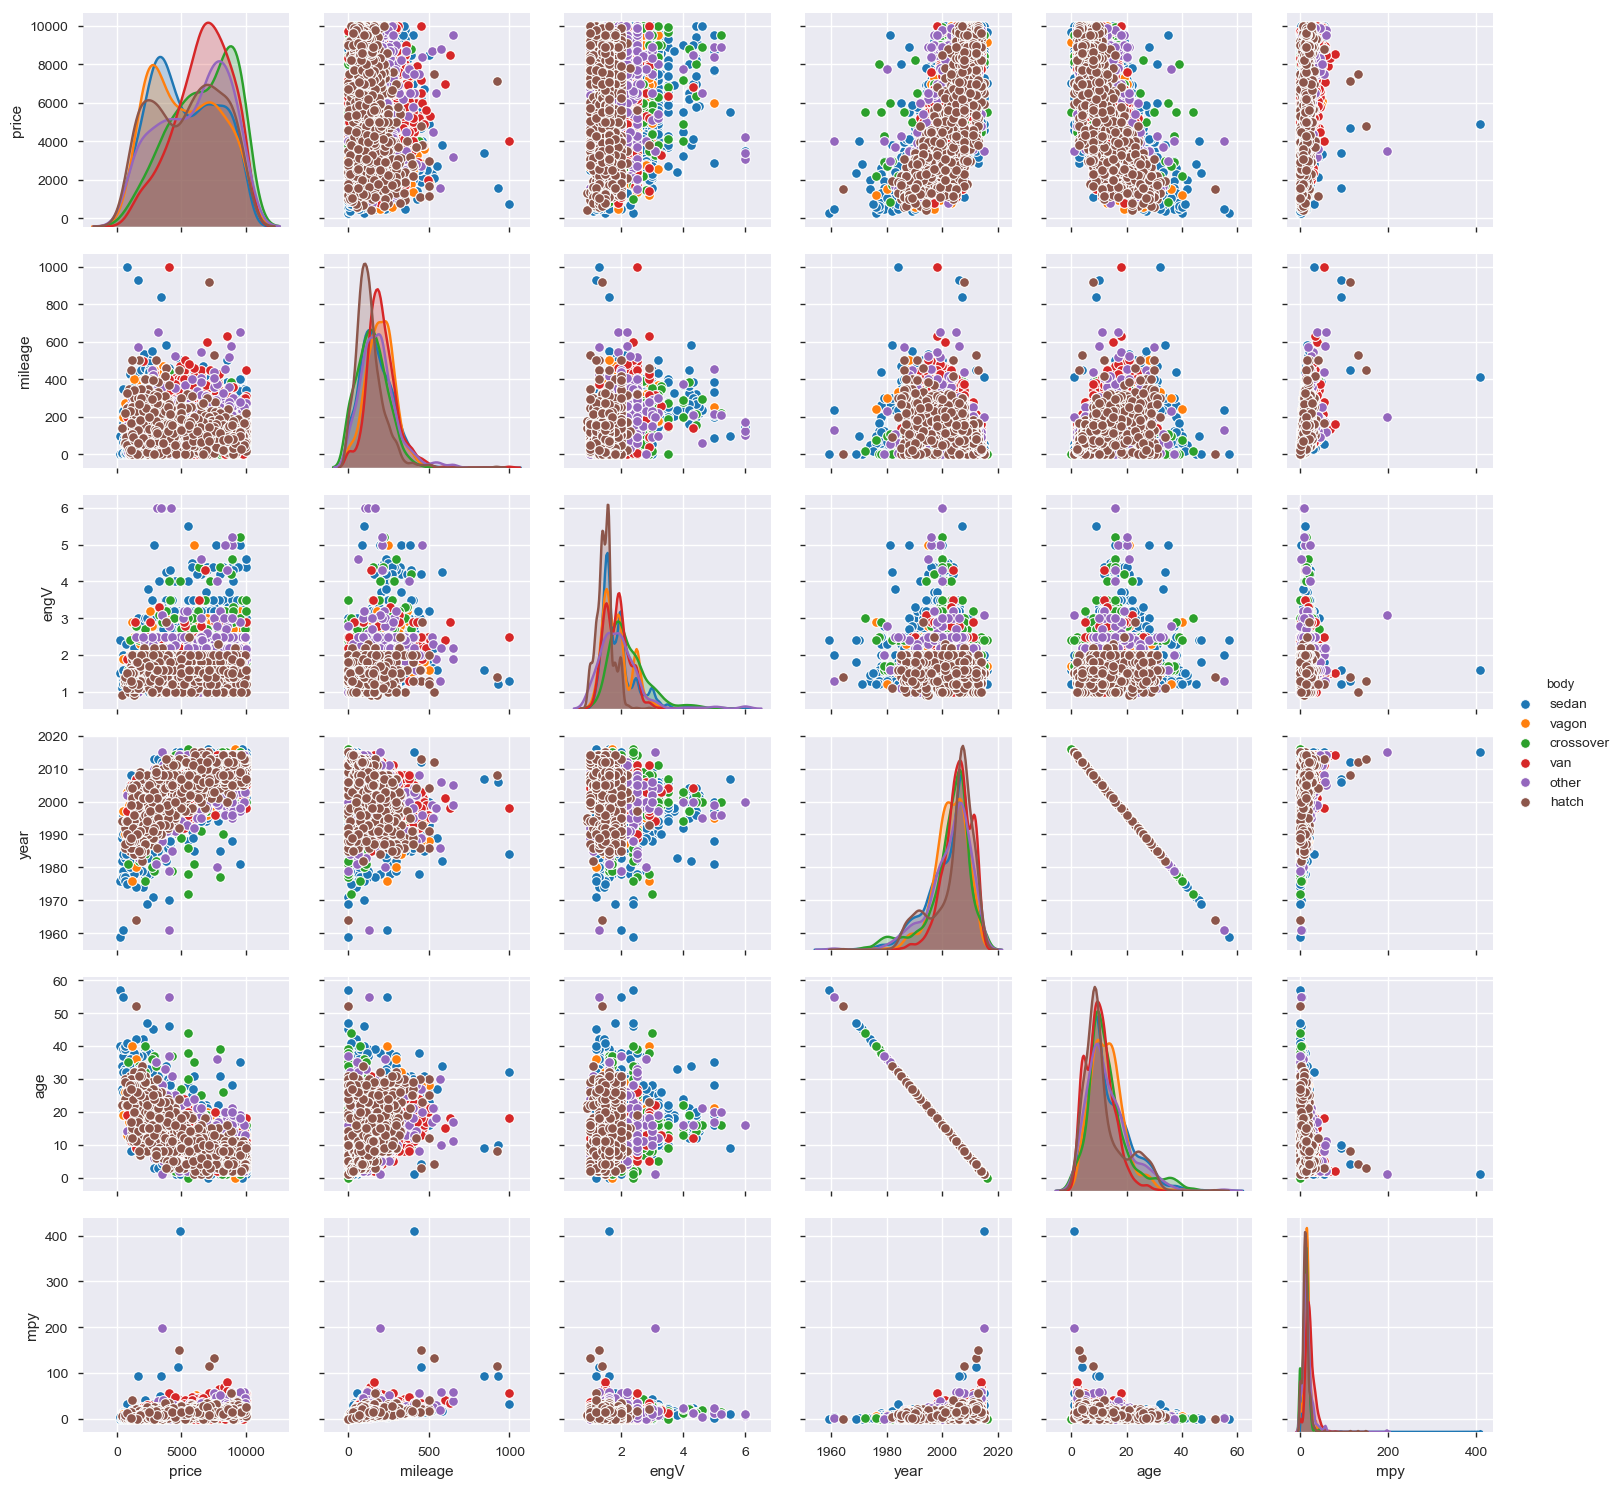

In [60]:
sns.pairplot(data=cars_clean[cars_clean.price_cat=='Low'],hue='body')

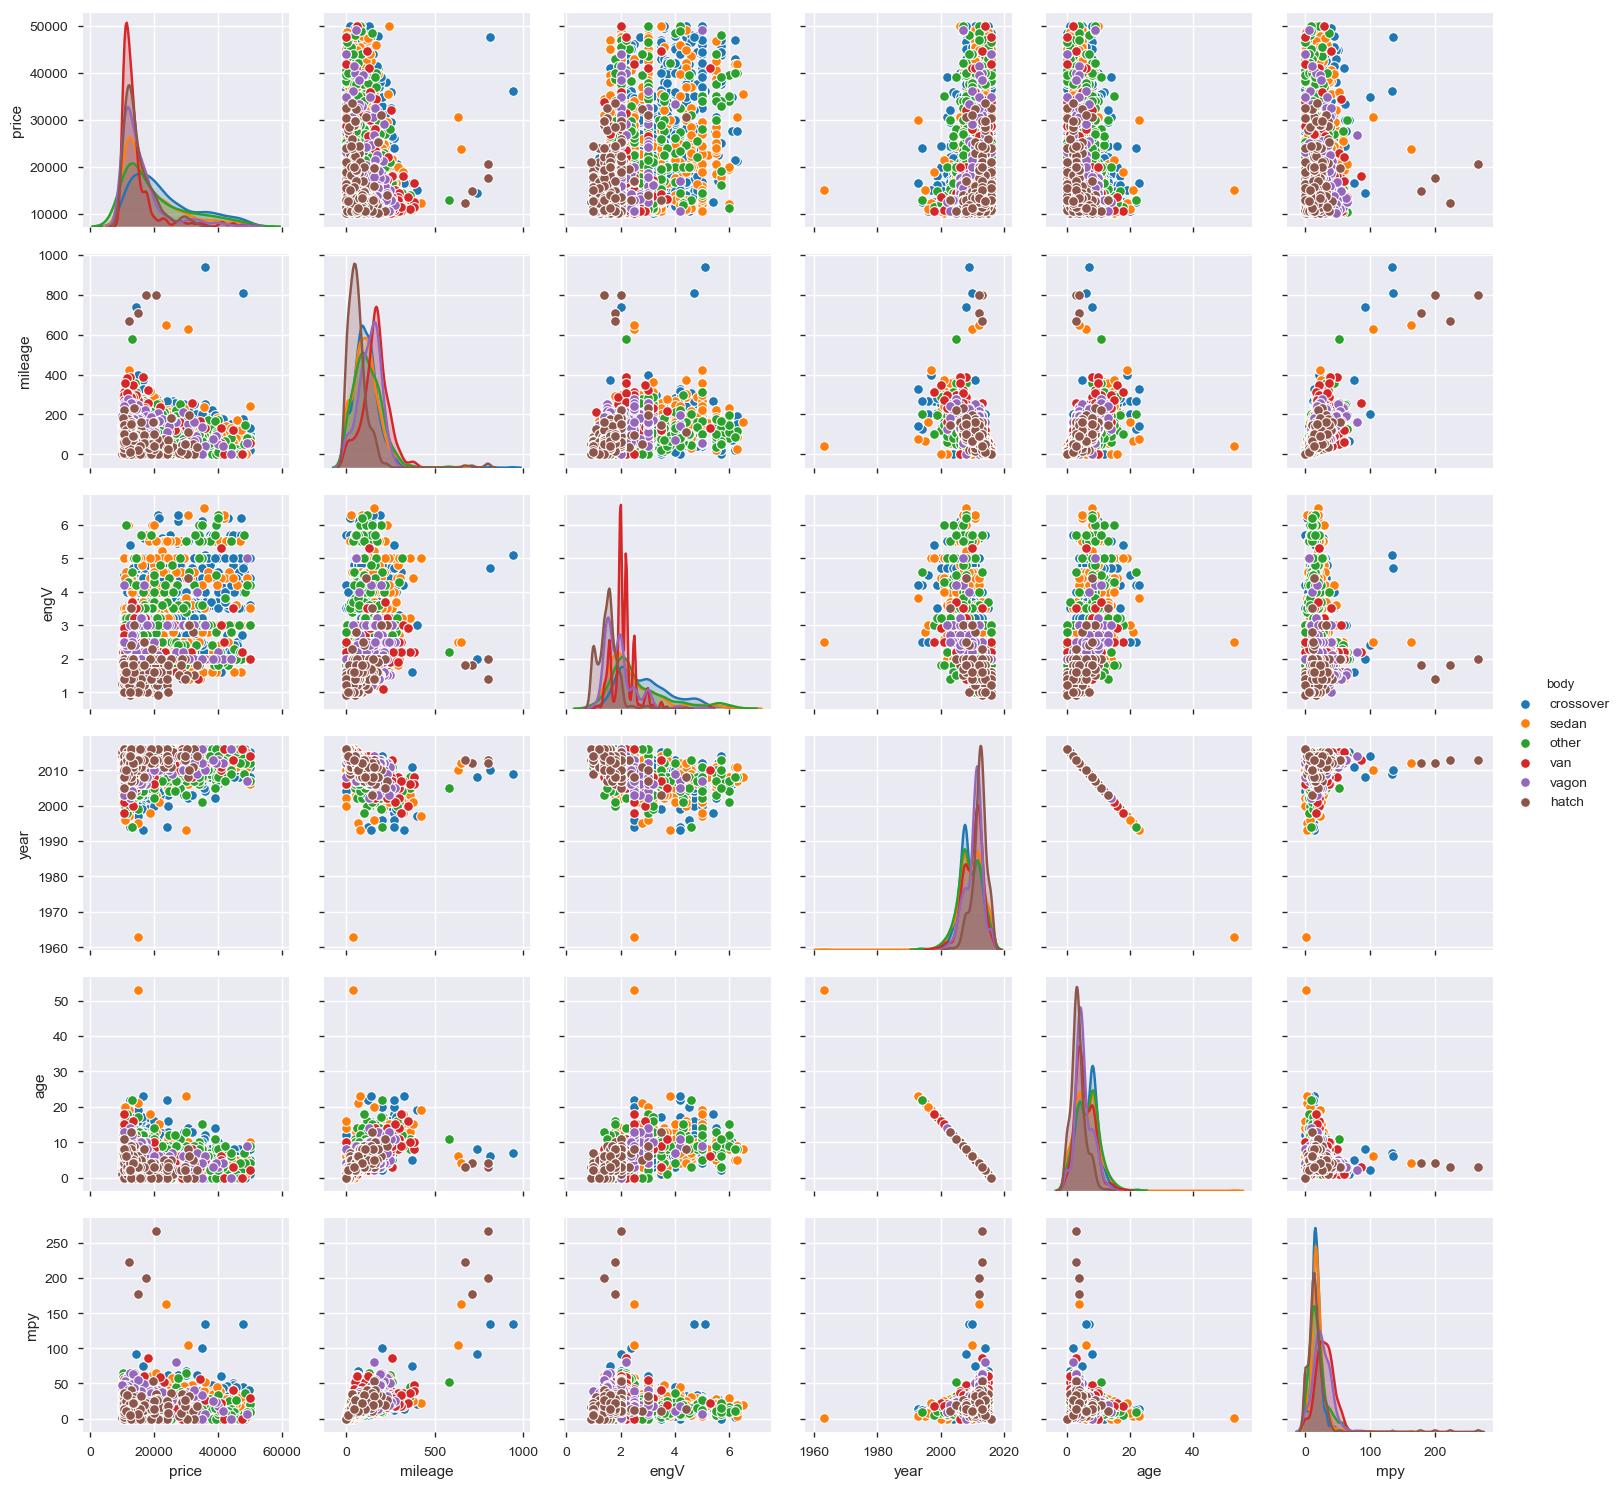

In [61]:
sns.pairplot(data=cars_clean[cars_clean.price_cat=='Moderate'],hue='body')

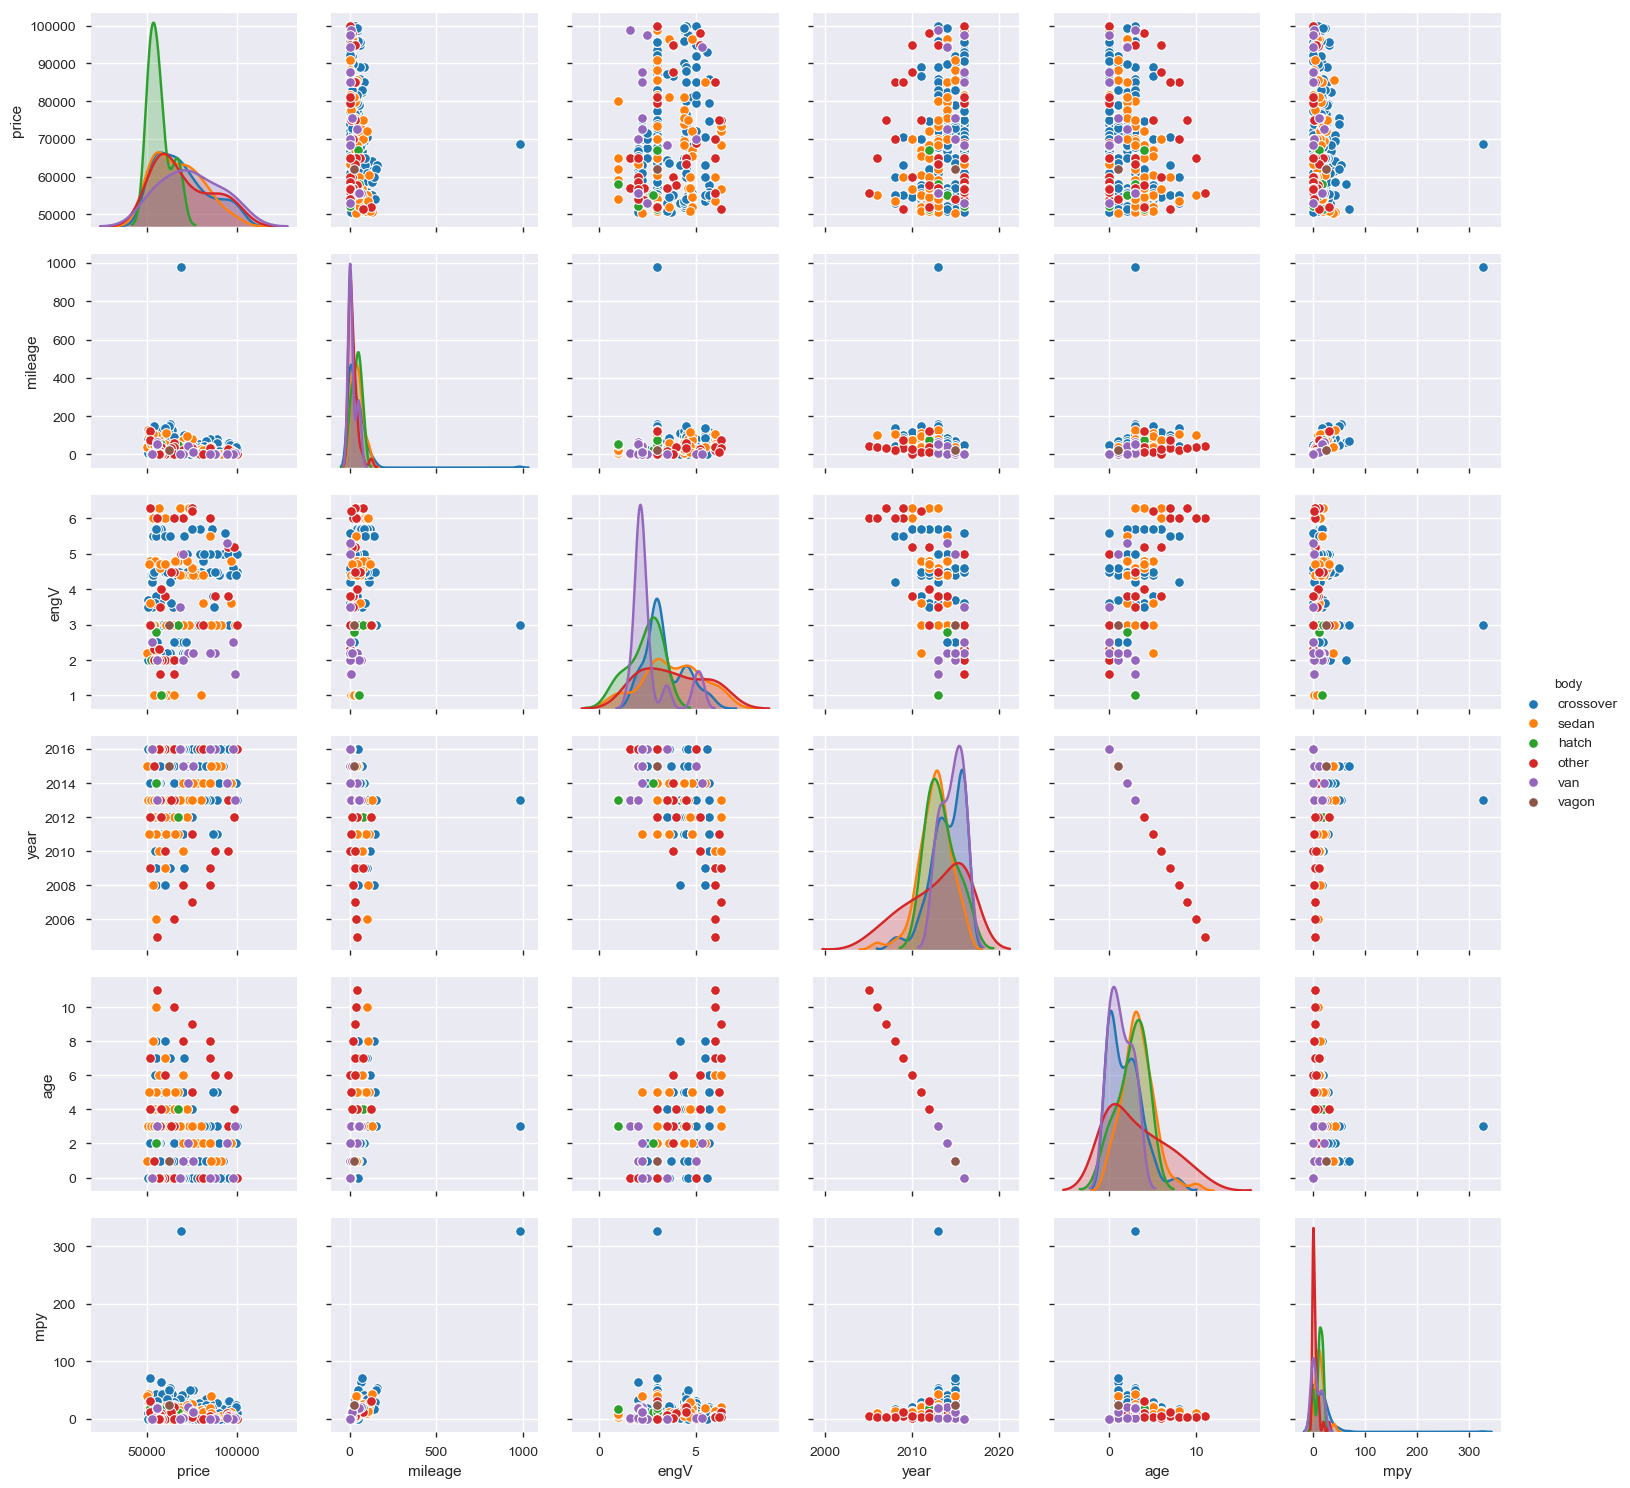

In [62]:
sns.pairplot(data=cars_clean[cars_clean.price_cat=='High'],hue='body')

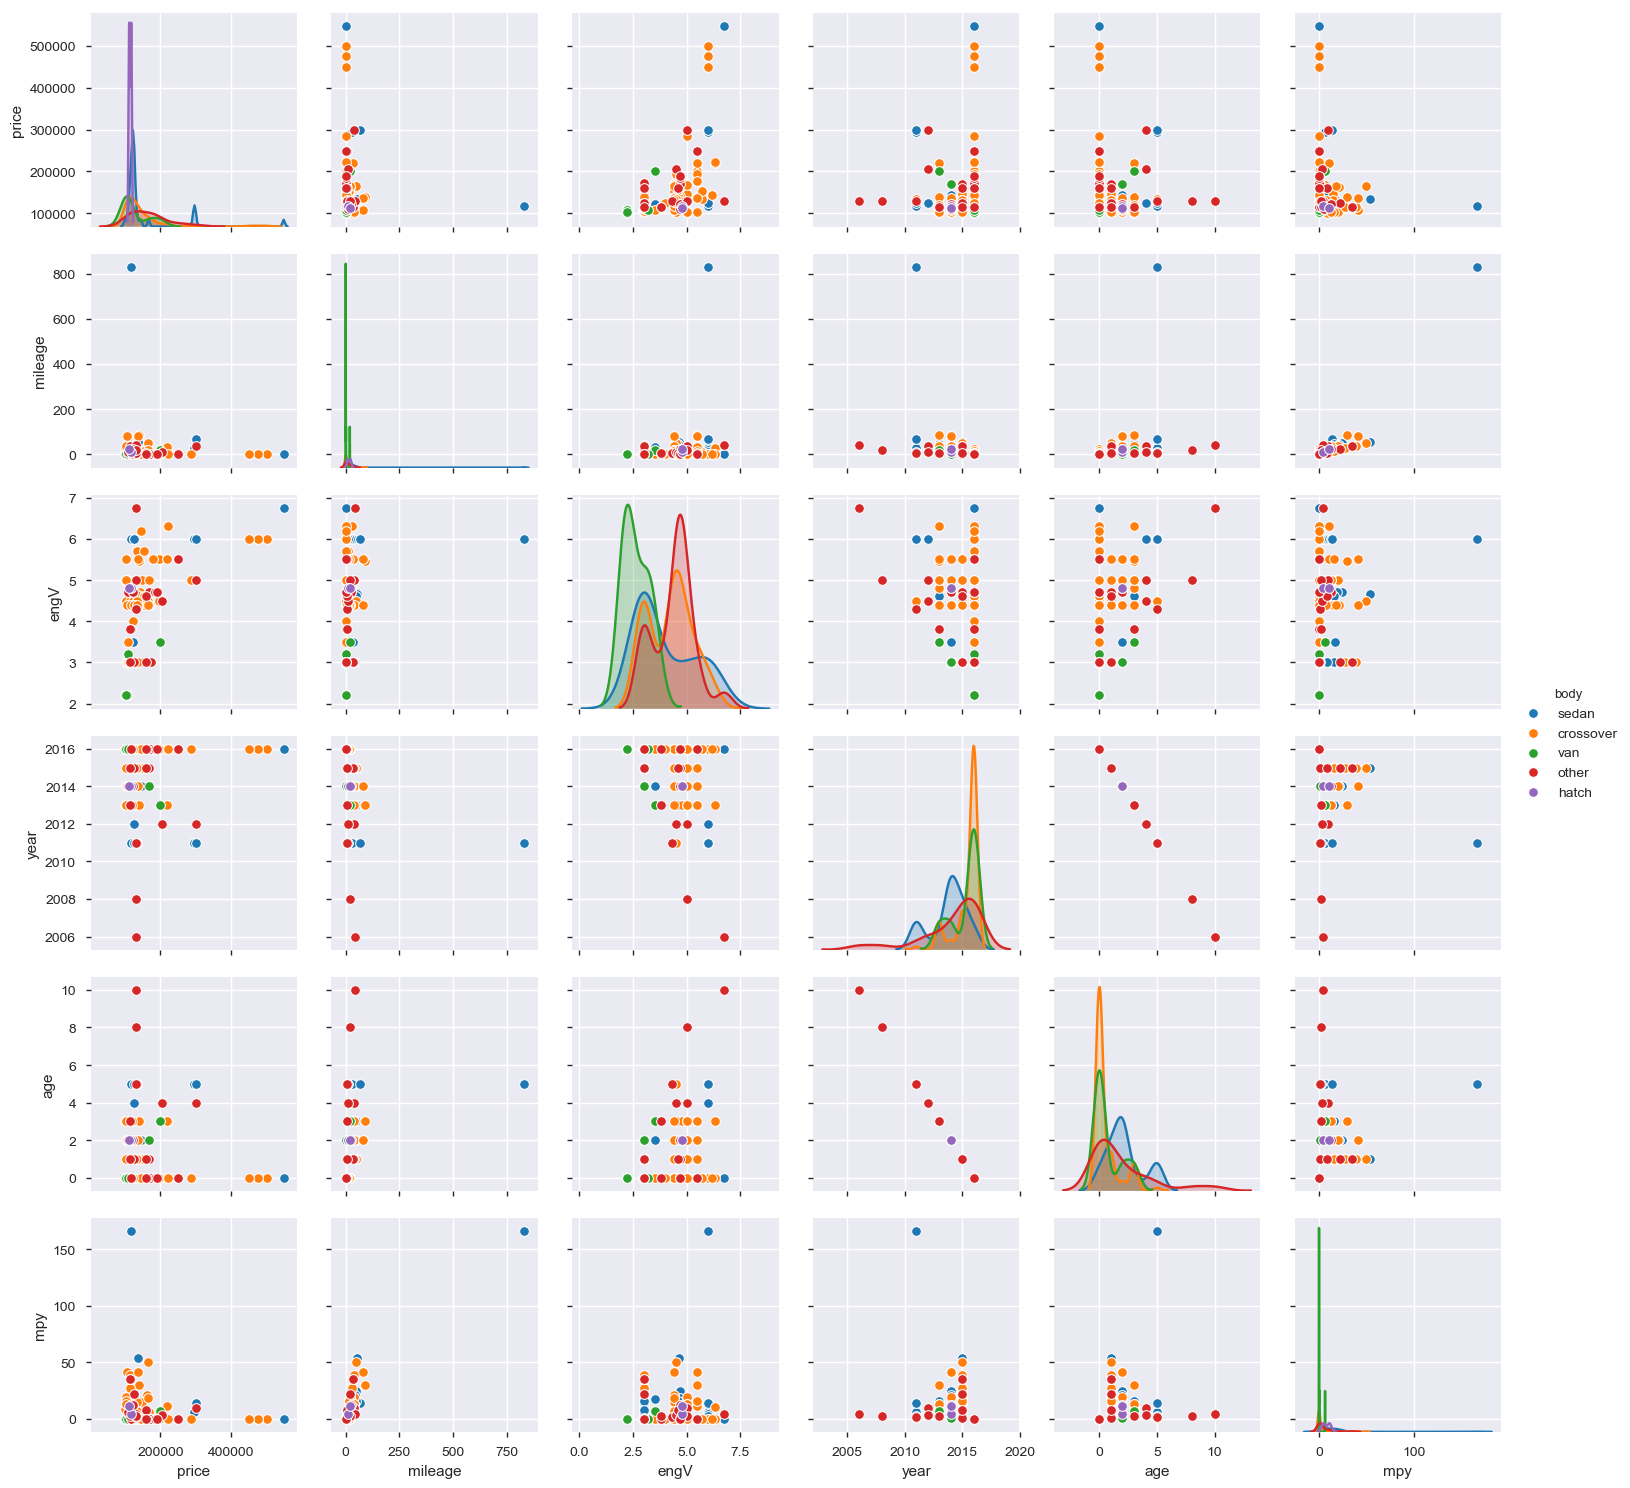

In [63]:
sns.pairplot(data=cars_clean[cars_clean.price_cat=='Extreme'],hue='body')

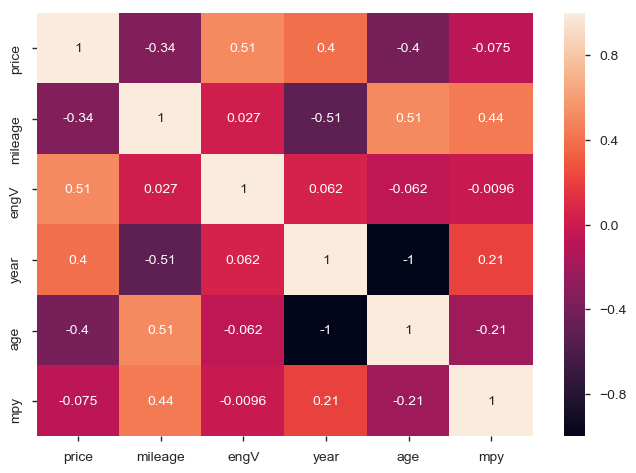

In [64]:
sns.heatmap(cars_clean.corr(),annot=True)

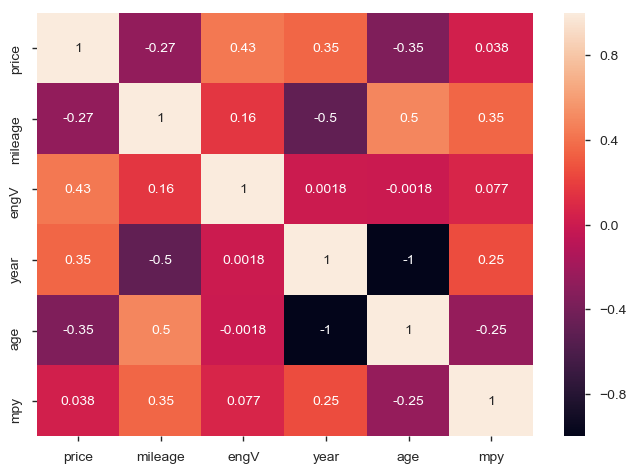

In [65]:
sns.heatmap(cars_clean[cars_clean.body == 'sedan'].corr(),annot=True)

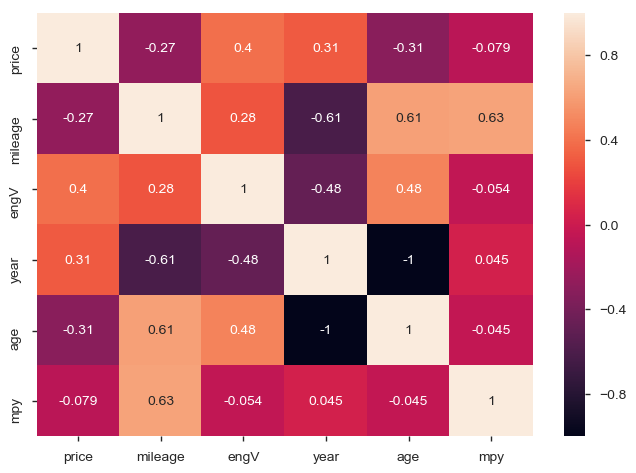

In [66]:
sns.heatmap(cars_clean[cars_clean.price_cat == 'Moderate'].corr(),annot=True)

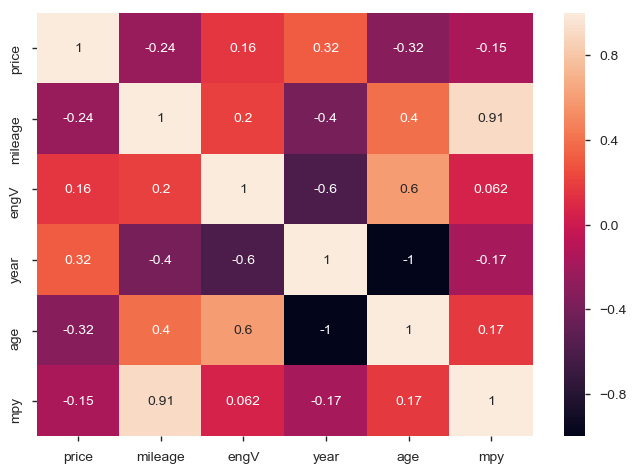

In [67]:
sns.heatmap(cars_clean[cars_clean.price_cat == 'High'].corr(),annot=True)

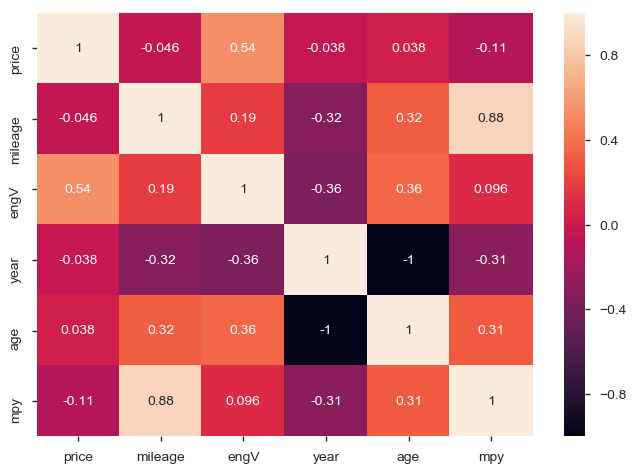

In [68]:
sns.heatmap(cars_clean[cars_clean.price_cat == 'Extreme'].corr(),annot=True)

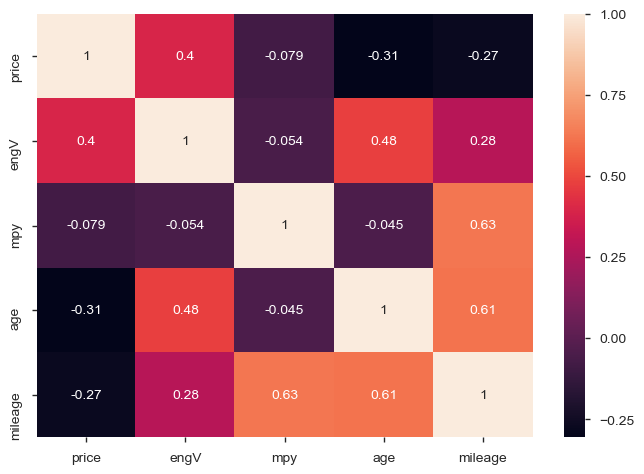

In [69]:
sns.heatmap(cars_clean[cars_clean.price_cat == 'Moderate'][['price','engV','mpy','age','mileage']].corr(),annot=True)

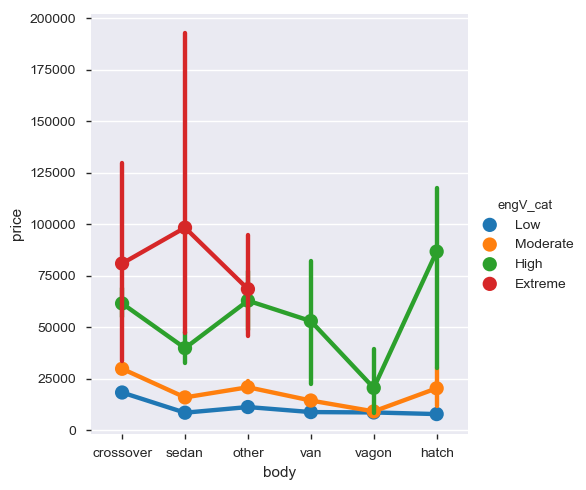

In [70]:
sns.factorplot(x="body",y="price",hue="engV_cat",data=cars_clean)

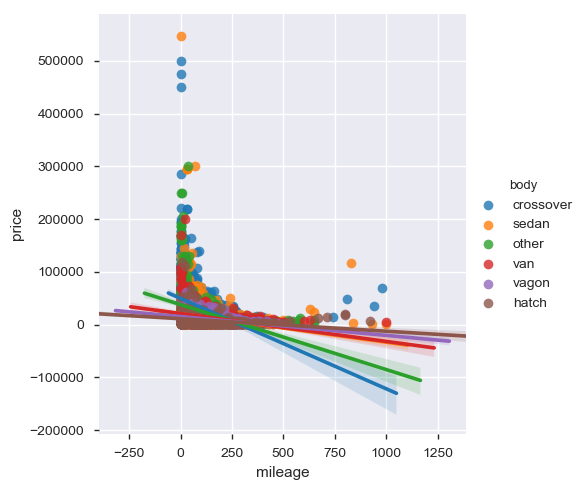

In [71]:
# f,ax = plt.subplots(3,2,figsize=(22,20))
sns.lmplot(x="mileage",y="price",hue="body",data=cars_clean,sharey=True)

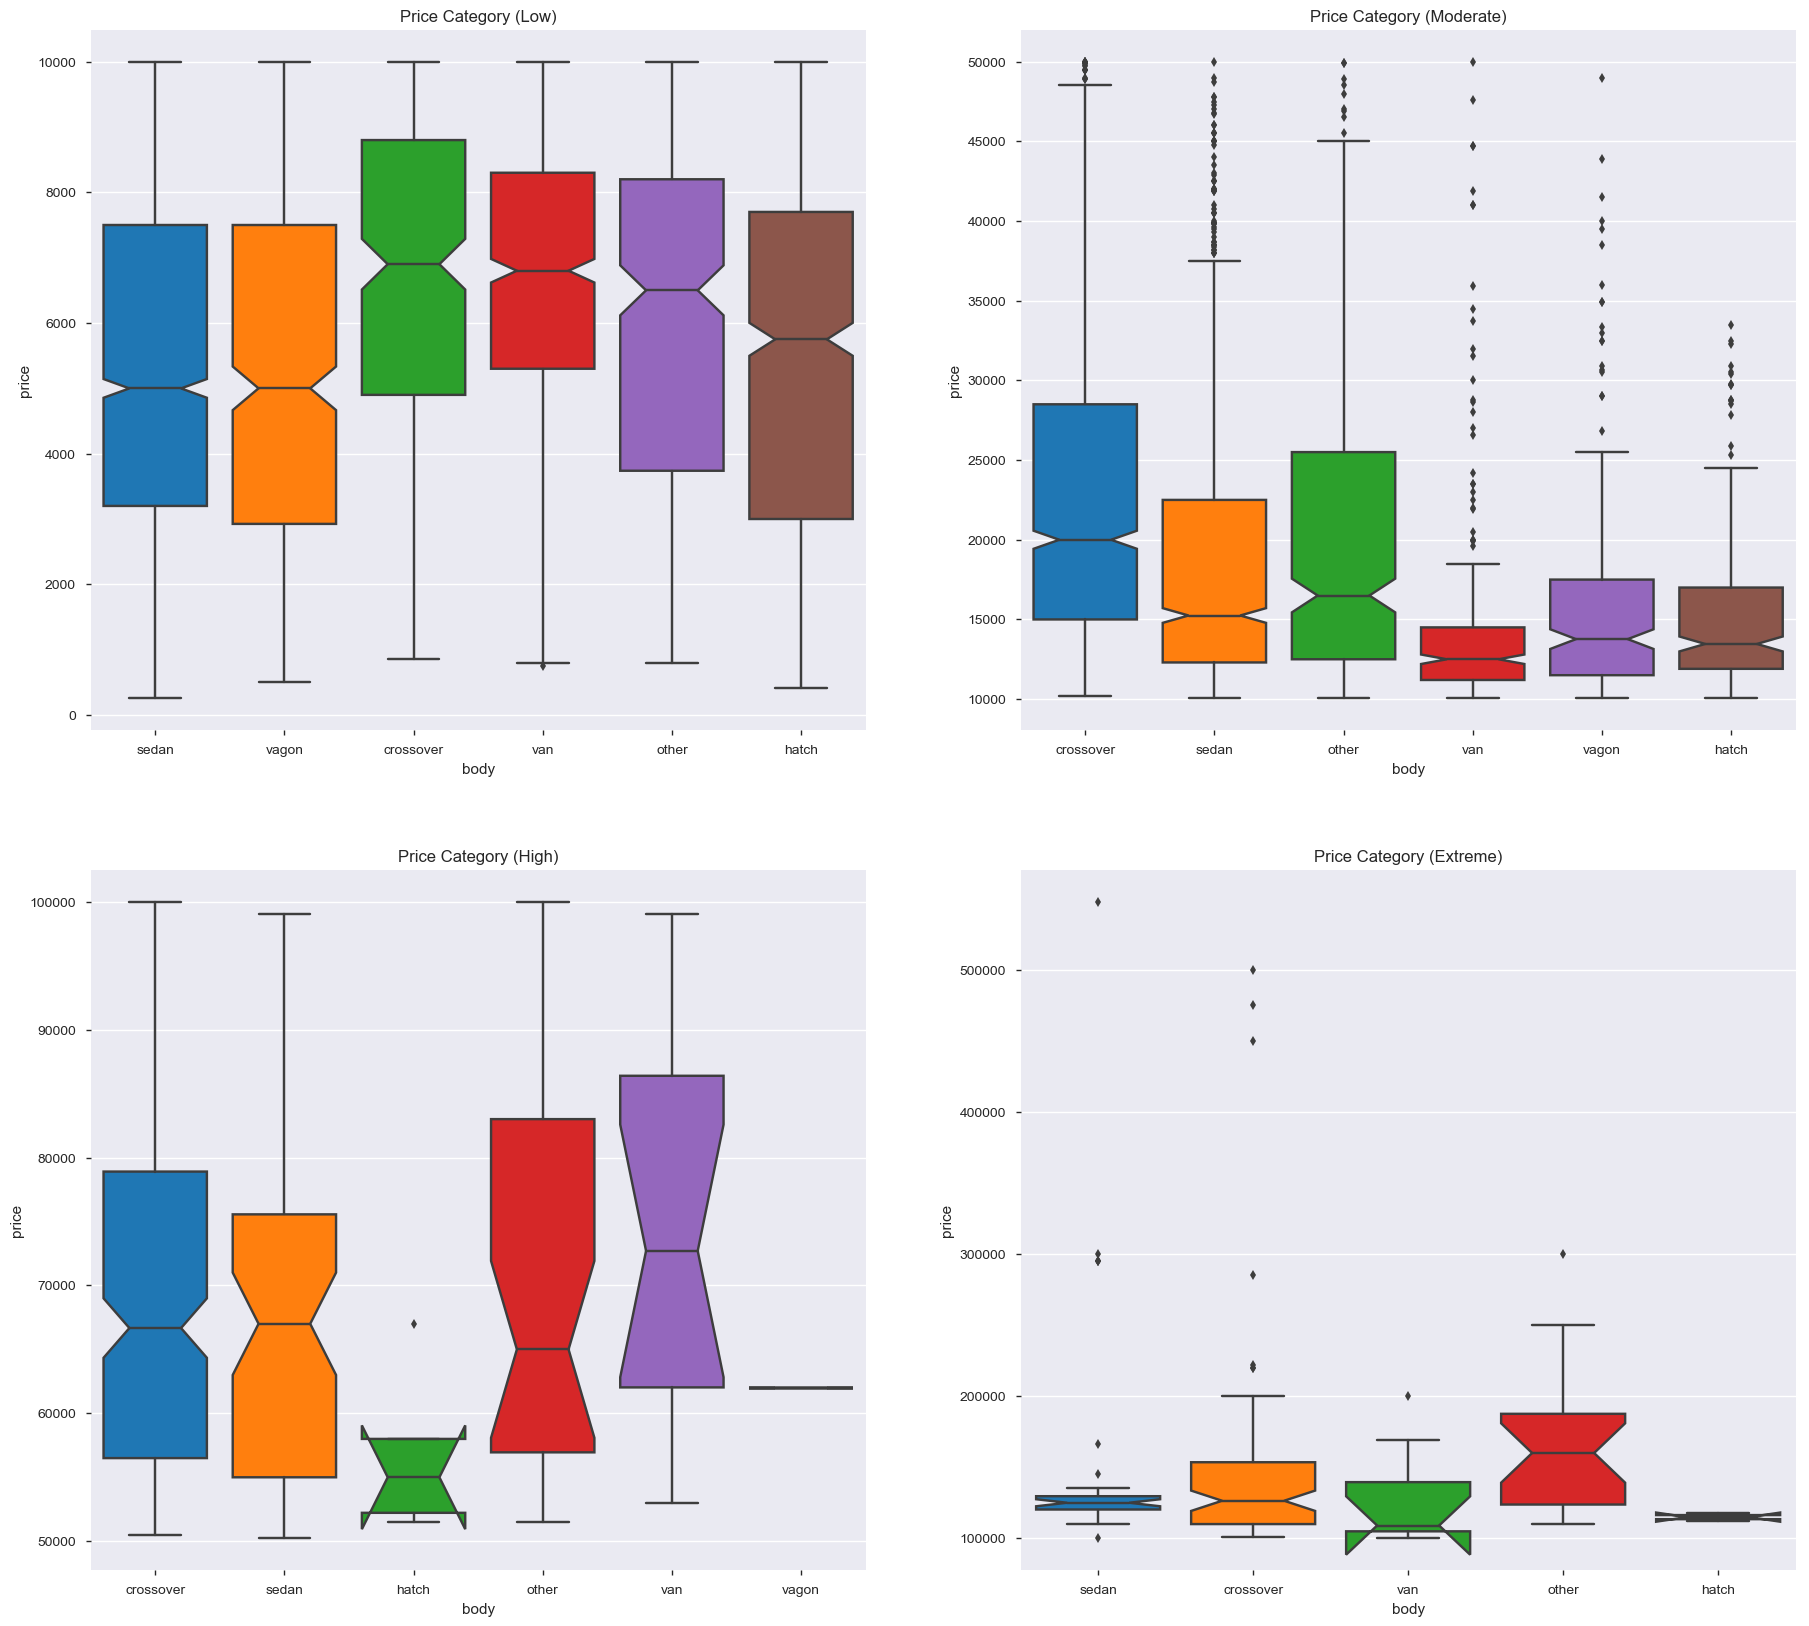

In [72]:
# plt.figure(figsize=(20,10))
f,ax = plt.subplots(2,2,figsize=(22,20))
sns.boxplot(x="body", y="price",notch=True, saturation=1, data=cars_clean[cars_clean.price_cat == 'Low'],ax=ax[0,0])
sns.boxplot(x="body", y="price",notch=True, saturation=1, data=cars_clean[cars_clean.price_cat == 'Moderate'],ax=ax[0,1])
sns.boxplot(x="body", y="price",notch=True, saturation=1, data=cars_clean[cars_clean.price_cat == 'High'],ax=ax[1,0])
sns.boxplot(x="body", y="price",notch=True, saturation=1, data=cars_clean[cars_clean.price_cat == 'Extreme'],ax=ax[1,1])

ax[0,0].set_title('Price Category (Low)')
ax[0,1].set_title('Price Category (Moderate)')
ax[1,0].set_title('Price Category (High)')
ax[1,1].set_title('Price Category (Extreme)')
plt.show()

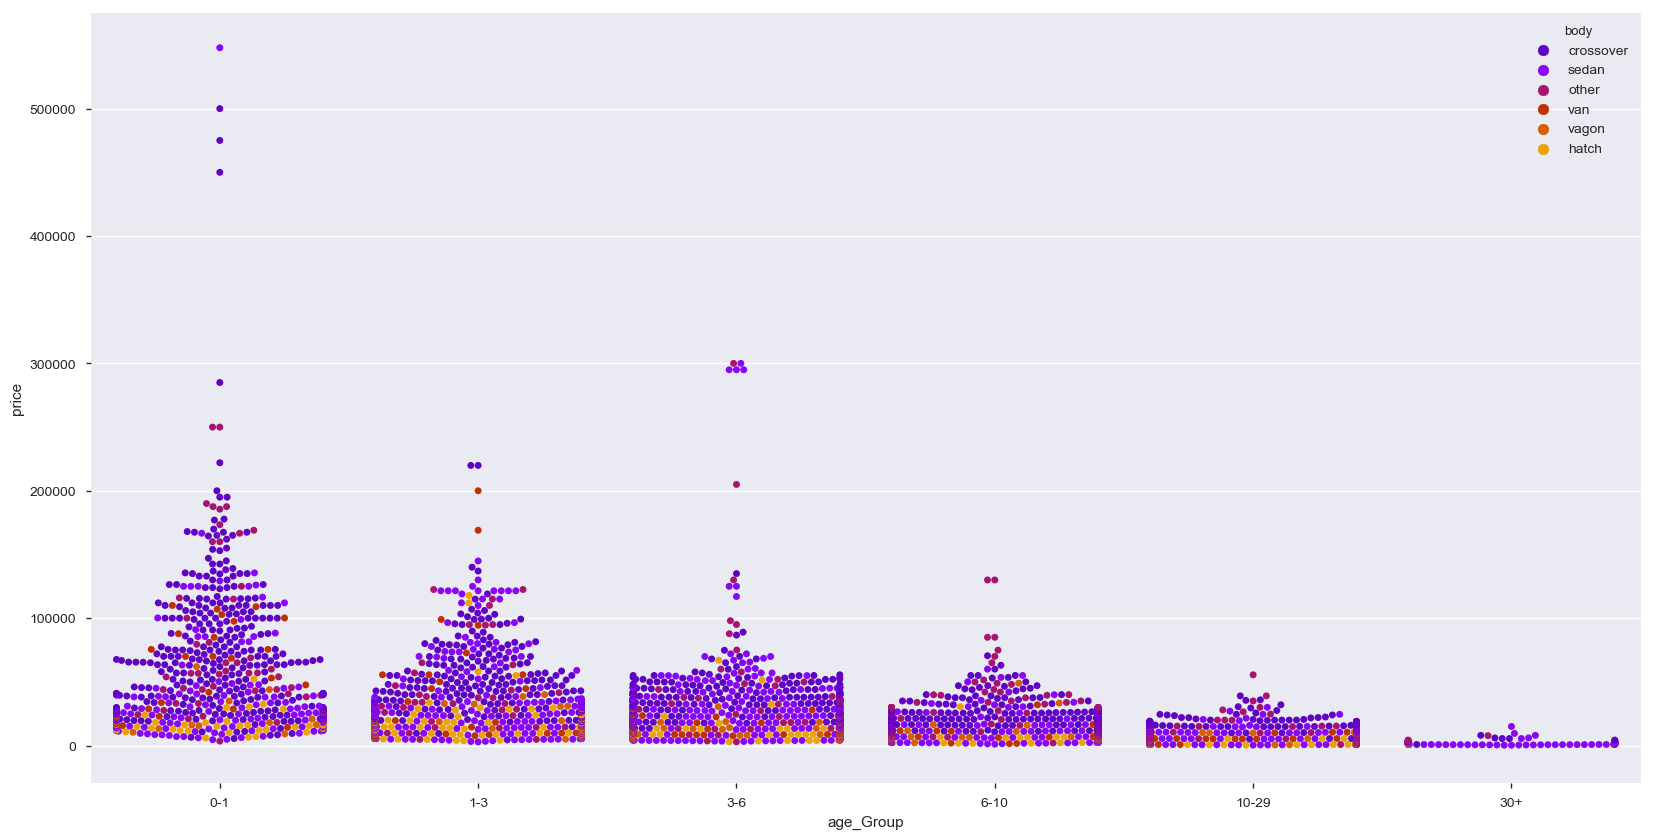

In [147]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="age_Group", y="price", hue='body', palette="gnuplot", data=cars_clean)

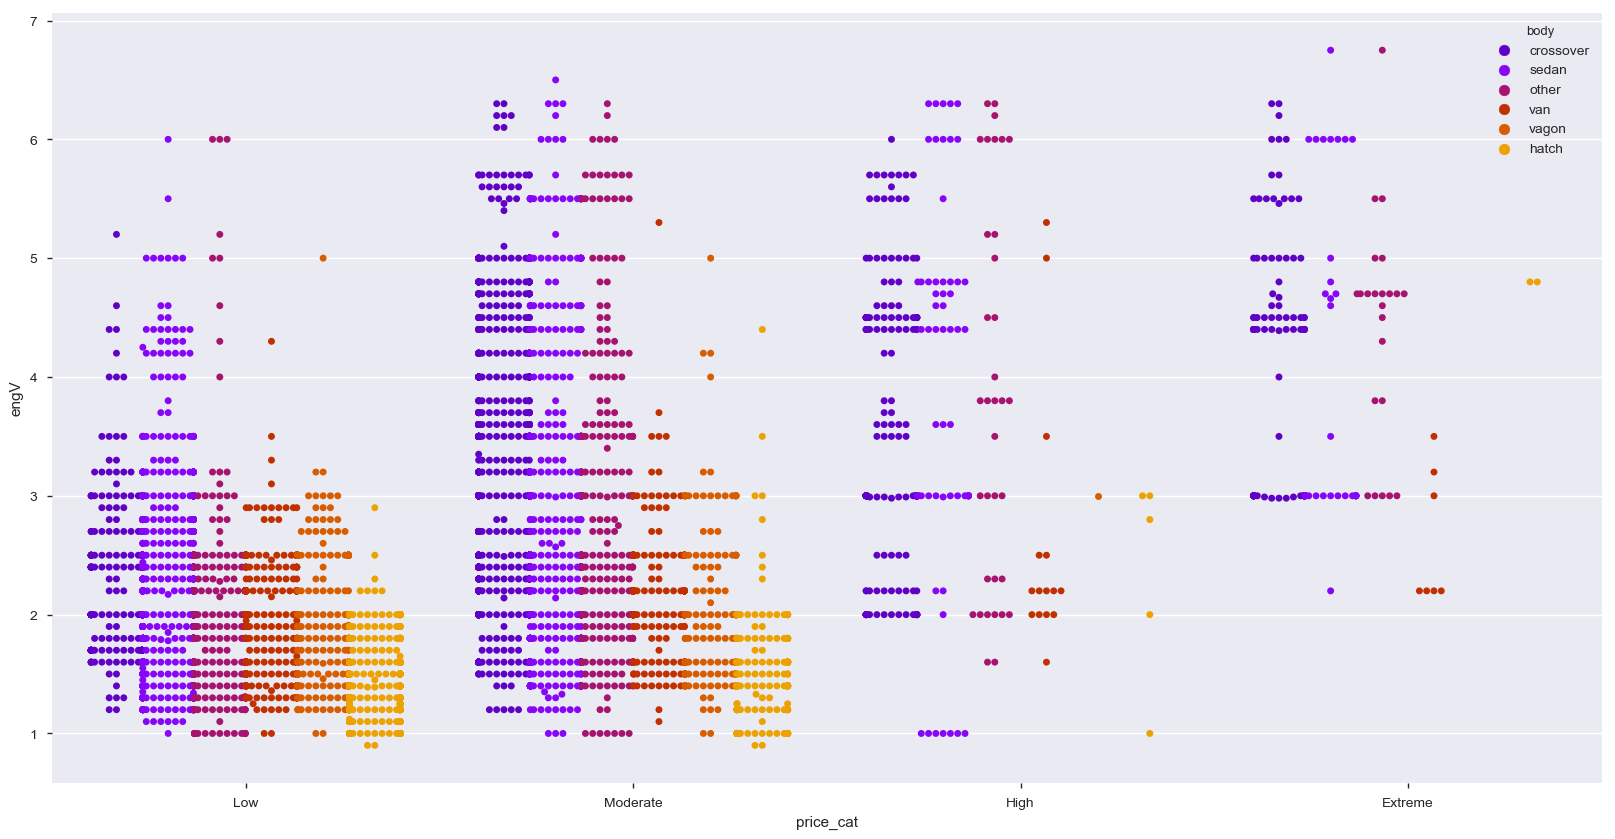

In [74]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="price_cat", y="engV", hue='body', palette="gnuplot",dodge=True, data=cars_clean)